In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install category_encoders
#!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dateutil import parser
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 160)
sns.set(style="whitegrid")


In [3]:
# load files
campaign = pd.read_csv('../data/campaign.csv', dtype=str)   
mortgage = pd.read_csv('../data/mortgage.csv', dtype=str)

# quick shape and sample
print("Campaign shape:", campaign.shape)
print("Mortgage shape:", mortgage.shape)
print("\nCampaign columns:\n", campaign.columns.tolist())
print("\nMortgage columns:\n", mortgage.columns.tolist())

# show first 5 rows of each (transpose small preview)
display(campaign.head().T)
display(mortgage.head().T)

Campaign shape: (32060, 16)
Mortgage shape: (32561, 18)

Campaign columns:
 ['participant_id', 'name_title', 'first_name', 'last_name', 'age', 'postcode', 'marital_status', 'education', 'job_title', 'occupation_level', 'education_num', 'familiarity_FB', 'view_FB', 'interested_insurance', 'company_email', 'created_account']

Mortgage columns:
 ['full_name', 'dob', 'town', 'paye', 'salary_band', 'years_with_employer', 'months_with_employer', 'hours_per_week', 'capital_gain', 'capital_loss', 'new_mortgage', 'sex', 'religion', 'relationship', 'race', 'native_country', 'workclass', 'demographic_characteristic']


,0,1,2,3,4
participant_id,9.00E+12,2.76E+12,8.45E+12,5.78E+12,8.69E+12
name_title,Mr.,NaN,Mr.,Mr.,Miss
first_name,Dale,Joel,Craig,Brandon,Brett
last_name,Coles,Allen,Davis,Thornton,Fletcher
age,39,50,38,53,28
postcode,EH4 9FL,LS5H 0JG,EH8W 2QJ,EH2 5UE,SN19 0PU
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
job_title,Furniture conservator/restorer,"Administrator, sports",Armed forces training and education officer,Facilities assistant,Information systems manager
occupation_level,1,4,12,1,12


,0,1,2,3,4
full_name,Mr. Dale Coles,Joel Allen,Mr. Craig Marc Davis,Mr. Brandon Thornton,Miss Brett Carol Fletcher
dob,10/05/1979,06/07/1968,10/02/1979,20/10/1965,20/02/1990
town,Edinburgh,Leeds,Edinburgh,Edinburgh,Swindon
paye,53791313,24005258,44124649,85701281,BR442000
salary_band,£18109 yearly,£16945 yearly,£729.87 pw,£19087 yearly,£2741.5 per month
years_with_employer,20,28,14,32,3
months_with_employer,6,1,5,6,6
hours_per_week,40,13,40,40,40
capital_gain,2174,0,0,0,0
capital_loss,0,0,0,0,0


In [4]:
# -----------------------------------------
# STEP 2: DATA QUALITY CHECKS
# -----------------------------------------

print("=== CAMPAIGN DATASET INFO ===")
campaign_info = campaign.info()
print(campaign_info)


# -------------------------------
# Missing value summary
# -------------------------------
print("\n=== Missing Values: Campaign ===")
print(campaign.isnull().sum().sort_values(ascending=False))


# -------------------------------
# Duplicate row check
# -------------------------------
print("\nCampaign duplicates:", campaign.duplicated().sum())

# -------------------------------
# Quick statistics for numeric-looking columns
# (convert where possible)
# -------------------------------
campaign_num = campaign.apply(pd.to_numeric, errors='ignore')

print("\n=== Campaign Describe ===")
display(campaign_num.describe(include='all').T)



=== CAMPAIGN DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   participant_id        32060 non-null  object
 1   name_title            19859 non-null  object
 2   first_name            32060 non-null  object
 3   last_name             32060 non-null  object
 4   age                   32060 non-null  object
 5   postcode              32060 non-null  object
 6   marital_status        32060 non-null  object
 7   education             32060 non-null  object
 8   job_title             32060 non-null  object
 9   occupation_level      32060 non-null  object
 10  education_num         32060 non-null  object
 11  familiarity_FB        32060 non-null  object
 12  view_FB               32060 non-null  object
 13  interested_insurance  32060 non-null  object
 14  company_email         32060 non-null  object
 15  create

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
participant_id,32060.0,NaN,NaN,NaN,4973695982101.294922,2883567871878.986328,88593678.0,2490000000000.0,4960000000000.0,7470000000000.0,10000000000000.0
name_title,19859,5,Mr.,10704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,32060,182,Bernard,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,32060,500,Smith,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,32060.0,NaN,NaN,NaN,38.564816,13.637532,17.0,28.0,37.0,48.0,90.0
postcode,32060,31398,EH8 3BN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,32060,7,Married-civ-spouse,14747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32060,16,HS-grad,10347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,32060,691,"Accountant, chartered",484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation_level,32060.0,NaN,NaN,NaN,7.757673,3.859709,1.0,5.0,8.0,10.0,20.0


In [5]:
# -----------------------------------------
# STEP 2: DATA QUALITY CHECKS
# -----------------------------------------

print("\n=== MORTGAGE DATASET INFO ===")
mortgage_info = mortgage.info()
print(mortgage_info)

# -------------------------------
# Missing value summary
# -------------------------------

print("\n=== Missing Values: Mortgage ===")
print(mortgage.isnull().sum().sort_values(ascending=False))

# -------------------------------
# Duplicate row check
# -------------------------------
print("Mortgage duplicates:", mortgage.duplicated().sum())

# -------------------------------
# Quick statistics for numeric-looking columns
# (convert where possible)
# -------------------------------
mortgage_num = mortgage.apply(pd.to_numeric, errors='ignore')


print("\n=== Mortgage Describe ===")
display(mortgage_num.describe(include='all').T)



=== MORTGAGE DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   full_name                   32561 non-null  object
 1   dob                         32561 non-null  object
 2   town                        32561 non-null  object
 3   paye                        32561 non-null  object
 4   salary_band                 32561 non-null  object
 5   years_with_employer         32561 non-null  object
 6   months_with_employer        32561 non-null  object
 7   hours_per_week              32561 non-null  object
 8   capital_gain                32561 non-null  object
 9   capital_loss                32561 non-null  object
 10  new_mortgage                32561 non-null  object
 11  sex                         32561 non-null  object
 12  religion                    32561 non-null  object
 13  relationship   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
full_name,32561,31169,Toby Jones,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dob,32561,15164,09/10/1984,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
town,32561,2649,Edinburgh,19523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paye,32561,26475,NW384000,3307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_band,32561,18326,£19360 yearly,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_with_employer,32561.0,NaN,NaN,NaN,5.170326,6.437202,0.0,1.0,3.0,7.0,57.0
months_with_employer,32561.0,NaN,NaN,NaN,5.519425,3.466831,0.0,2.0,6.0,9.0,11.0
hours_per_week,32561.0,NaN,NaN,NaN,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
capital_gain,32561.0,NaN,NaN,NaN,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,NaN,NaN,NaN,87.30383,402.960219,0.0,0.0,0.0,0.0,4356.0


In [6]:
# -----------------------------------------
# STEP 3: DEEP COLUMN-LEVEL EDA
# -----------------------------------------

import re

print("============= DATA TYPE CHECKS =============")
print("\nCampaign dtypes:")
print(campaign.dtypes)

print("\nMortgage dtypes:")
print(mortgage.dtypes)


# ---------------------------------------------------
# A. CHECK NUMERIC-LIKE COLUMNS STORED AS OBJECTS
# ---------------------------------------------------

def detect_numeric_strings(series):
    """Check what % of non-null values look like numbers."""
    pattern = r'^-?\d+(\.\d+)?$'
    numeric_like = series.dropna().astype(str).str.match(pattern)
    return numeric_like.mean()

print("\n=== Numeric-like Columns (Campaign) ===")
for col in campaign.columns:
    pct = detect_numeric_strings(campaign[col])
    if pct > 0.8: 
        print(f"{col}: {pct*100:.1f}% look numeric → consider converting.")

print("\n=== Numeric-like Columns (Mortgage) ===")
for col in mortgage.columns:
    pct = detect_numeric_strings(mortgage[col])
    if pct > 0.8:
        print(f"{col}: {pct*100:.1f}% look numeric → consider converting.")

        
# ---------------------------------------------------
# B. UNIQUE VALUE SUMMARIES (CATEGORICAL EDA)
# ---------------------------------------------------
print("\n============= UNIQUE VALUES (Campaign) =============")
for col in campaign.columns:
    print(f"{col}: {campaign[col].nunique()} unique")

print("\n============= UNIQUE VALUES (Mortgage) =============")
for col in mortgage.columns:
    print(f"{col}: {mortgage[col].nunique()} unique")


============= DATA TYPE CHECKS =============

Campaign dtypes:
participant_id          object
name_title              object
first_name              object
last_name               object
age                     object
postcode                object
marital_status          object
education               object
job_title               object
occupation_level        object
education_num           object
familiarity_FB          object
view_FB                 object
interested_insurance    object
company_email           object
created_account         object
dtype: object

Mortgage dtypes:
full_name                     object
dob                           object
town                          object
paye                          object
salary_band                   object
years_with_employer           object
months_with_employer          object
hours_per_week                object
capital_gain                  object
capital_loss                  object
new_mortgage                  object
se

In [7]:
import re

# ---------------------------------------------------
# C. CHECK FOR COMMON JOIN KEYS
# ---------------------------------------------------

# Fix campaign full_name
campaign["full_name_clean"] = (
    campaign["first_name"].str.strip().str.lower() + " " +
    campaign["last_name"].str.strip().str.lower()
)

# --- IMPROVED TITLE REMOVAL REGEX ---
title_regex = r"^(mr|mrs|ms|miss|dr|prof|sir|madam)\.?\s+"

mortgage["name_clean_temp"] = (
    mortgage["full_name"]
        .astype(str)
        .str.lower()
        .str.replace(r"\s+", " ", regex=True)
        .str.replace(title_regex, "", regex=True, flags=re.IGNORECASE)
        .str.strip()
)

# Extract first + last name
mortgage["first_last"] = mortgage["name_clean_temp"].str.split()

mortgage["full_name_clean"] = mortgage["first_last"].apply(
    lambda x: x[0] + " " + (x[-1] if len(x) > 1 else x[0])
)

# Compare overlap
common_names = set(campaign["full_name_clean"]).intersection(
                 set(mortgage["full_name_clean"]))

print("\n=========== POTENTIAL JOIN KEYS ===========")
print("Full name matches found:", len(common_names))



=========== POTENTIAL JOIN KEYS ===========
Full name matches found: 23621


In [8]:
# ---------------------------------------------------
# Calculate Age from DOB using year difference only
# ---------------------------------------------------

end_year = 2018

# Parse DOB (dayfirst format)
mortgage["dob_parsed"] = pd.to_datetime(
    mortgage["dob"], errors="coerce", dayfirst=True
)

# Extract birth year
dob_year = mortgage["dob_parsed"].dt.year

# Age = end_year - birth_year
mortgage["age_from_dob"] = end_year - dob_year

# # Show sample
# print(mortgage[["dob", "dob_parsed", "age_from_dob"]].head(10))

In [9]:
display(campaign.head().T)
display(mortgage.head().T)

,0,1,2,3,4
participant_id,9.00E+12,2.76E+12,8.45E+12,5.78E+12,8.69E+12
name_title,Mr.,NaN,Mr.,Mr.,Miss
first_name,Dale,Joel,Craig,Brandon,Brett
last_name,Coles,Allen,Davis,Thornton,Fletcher
age,39,50,38,53,28
postcode,EH4 9FL,LS5H 0JG,EH8W 2QJ,EH2 5UE,SN19 0PU
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
job_title,Furniture conservator/restorer,"Administrator, sports",Armed forces training and education officer,Facilities assistant,Information systems manager
occupation_level,1,4,12,1,12


,0,1,2,3,4
full_name,Mr. Dale Coles,Joel Allen,Mr. Craig Marc Davis,Mr. Brandon Thornton,Miss Brett Carol Fletcher
dob,10/05/1979,06/07/1968,10/02/1979,20/10/1965,20/02/1990
town,Edinburgh,Leeds,Edinburgh,Edinburgh,Swindon
paye,53791313,24005258,44124649,85701281,BR442000
salary_band,£18109 yearly,£16945 yearly,£729.87 pw,£19087 yearly,£2741.5 per month
years_with_employer,20,28,14,32,3
months_with_employer,6,1,5,6,6
hours_per_week,40,13,40,40,40
capital_gain,2174,0,0,0,0
capital_loss,0,0,0,0,0


In [10]:
# Ensure age columns are numeric
campaign["age"] = pd.to_numeric(campaign["age"], errors='coerce')
mortgage["age_from_dob"] = pd.to_numeric(mortgage["age_from_dob"], errors='coerce')

# Merge datasets on full_name_clean + age
merged_df = pd.merge(
    campaign,
    mortgage,
    left_on=["full_name_clean", "age"],
    right_on=["full_name_clean", "age_from_dob"],
    how="inner",
    suffixes=("_camp", "_mort")
)

print(f"Total records after merge: {merged_df.shape[0]}")

# Sample of merged data
display(merged_df.head().T)

Total records after merge: 16591


,0,1,2,3,4
participant_id,9.00E+12,2.76E+12,5.78E+12,8.69E+12,3.23E+12
name_title,Mr.,NaN,Mr.,Miss,Mrs.
first_name,Dale,Joel,Brandon,Brett,Hugh
last_name,Coles,Allen,Thornton,Fletcher,Armstrong
age,39,50,53,28,31
postcode,EH4 9FL,LS5H 0JG,EH2 5UE,SN19 0PU,SN8G 3XD
marital_status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
education,Bachelors,Bachelors,11th,Bachelors,Masters
job_title,Furniture conservator/restorer,"Administrator, sports",Facilities assistant,Information systems manager,Insurance broker
occupation_level,1,4,1,12,12


In [11]:
merged_df.shape

(16591, 39)

In [12]:
print(merged_df.columns)

Index(['participant_id', 'name_title', 'first_name', 'last_name', 'age', 'postcode', 'marital_status', 'education', 'job_title', 'occupation_level',
       'education_num', 'familiarity_FB', 'view_FB', 'interested_insurance', 'company_email', 'created_account', 'full_name_clean', 'full_name', 'dob', 'town',
       'paye', 'salary_band', 'years_with_employer', 'months_with_employer', 'hours_per_week', 'capital_gain', 'capital_loss', 'new_mortgage', 'sex',
       'religion', 'relationship', 'race', 'native_country', 'workclass', 'demographic_characteristic', 'name_clean_temp', 'first_last', 'dob_parsed',
       'age_from_dob'],
      dtype='object')


In [13]:
print("Total unique postcodes:", merged_df['postcode'].nunique())

Total unique postcodes: 16113


In [14]:
print("Unique marital_status values:", merged_df['marital_status'].nunique())
print("Unique education_num values:", merged_df['education_num'].nunique())

Unique marital_status values: 7
Unique education_num values: 16


In [15]:
merged_df_columns_to_drop = ['participant_id', 'name_title', 'first_name', 'last_name','postcode','company_email','full_name_clean',
                  'full_name', 'dob','paye', 'name_clean_temp','first_last','dob_parsed','age_from_dob','new_mortgage']

merged_df.drop(merged_df_columns_to_drop,axis=1,inplace=True)
merged_df.head()

,age,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,39,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,No,Edinburgh,£18109 yearly,20,6,40,2174,0,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,50,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,No,Leeds,£16945 yearly,28,1,13,0,0,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,53,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,No,Edinburgh,£19087 yearly,32,6,40,0,0,Male,Christianity,Husband,Black,United Kingdom,Private,234721
3,28,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,No,Swindon,£2741.5 per month,3,6,40,0,0,Female,Christianity,Wife,Black,Sweden,Private,338409
4,31,Never-married,Masters,Insurance broker,12,18,6,3,1,Yes,Swindon,£3312.78 per month,4,4,50,14084,0,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781


In [16]:
print(merged_df['created_account'].unique())
filtered_df = merged_df[merged_df['created_account'].isin(['Yes', 'No'])].copy()
# Normalize case and strip whitespace
merged_df['created_account'] = merged_df['created_account'].str.strip().str.lower()

# Count all unique values including NaN
value_counts = merged_df['created_account'].value_counts(dropna=False)
print("Counts of each entry in 'created_account':")
print(value_counts)

['No' 'Yes' nan]
Counts of each entry in 'created_account':
created_account
NaN    14987
no      1468
yes      136
Name: count, dtype: int64


In [17]:
# Normalize case and strip whitespace
merged_df['created_account'] = merged_df['created_account'].str.strip().str.lower()

In [18]:
print(merged_df.shape)

(16591, 24)


In [19]:
# Unique values and counts for 'education'
print("Education unique values and counts:")
print(merged_df['education'].value_counts())

# Unique values and counts for 'age'
print("\nAge unique values and counts:")
print(merged_df['age'].value_counts().sort_index())

Education unique values and counts:
education
HS-grad         5347
Some-college    3766
Bachelors       2719
Masters          862
Assoc-voc        734
11th             590
Assoc-acdm       526
10th             469
7th-8th          327
Prof-school      300
9th              241
Doctorate        217
12th             212
5th-6th          173
1st-4th           85
Preschool         23
Name: count, dtype: int64

Age unique values and counts:
age
17    197
18    268
19    364
20    379
21    356
     ... 
83      1
84      3
85      1
88      1
90     23
Name: count, Length: 71, dtype: int64


In [20]:
# Make a copy of the original DataFrame
merged_df_clean = merged_df.copy()

# --- Bin 'age' into 10-year ranges ---
bins = list(range(10, 101, 10))  # 10-19, 20-29, ..., 90-99
labels = [f"{b}-{b+9}" for b in bins[:-1]]
merged_df_clean['age_group'] = pd.cut(merged_df_clean['age'], bins=bins, labels=labels, right=False)

# Optional: Check distribution
print("Age group distribution:")
print(merged_df_clean['age_group'].value_counts().sort_index())

# --- One-Hot Encode and Drop Original Columns ---
merged_df_clean_encoded = pd.get_dummies(
    merged_df_clean,
    columns=['education', 'age_group', 'marital_status'],
    prefix=['edu', 'age', 'marital'],
    dtype=int
)

# Drop original columns that were encoded
# merged_df_clean_encoded.drop(columns=['age', 'education', 'age_group', 'marital_status'], inplace=True)

# --- Frequency encode 'town' ---
town_freq = merged_df_clean_encoded['town'].value_counts(normalize=True)
merged_df_clean_encoded['town_freq'] = merged_df_clean_encoded['town'].map(town_freq)

# --- Print town-to-frequency mapping ---
town_freq_df = merged_df_clean_encoded[['town']].copy()
town_freq_df['town_freq'] = town_freq_df['town'].map(town_freq)

# Drop duplicates to show unique mappings
town_freq_mapping = town_freq_df.drop_duplicates().sort_values(by='town_freq', ascending=False)

print("\nTown to Frequency Mapping:")
print(town_freq_mapping.head(10))  # Show top 10 most frequent towns


# --- Frequency encode 'town' ---
town_freq = merged_df_clean_encoded['town'].value_counts(normalize=True)
merged_df_clean_encoded['town_freq'] = merged_df_clean_encoded['town'].map(town_freq)

merged_df_clean_encoded.drop(columns=['town'], inplace=True)

# Display a sample
print(merged_df_clean_encoded[['town_freq']].head())

# Display result
display(merged_df_clean_encoded.head().T)

Age group distribution:
age_group
10-19     829
20-29    4083
30-39    4436
40-49    3715
50-59    2227
60-69    1004
70-79     249
80-89      25
90-99      23
Name: count, dtype: int64

Town to Frequency Mapping:
            town  town_freq
0      Edinburgh   0.596287
3        Swindon   0.162618
1          Leeds   0.047918
12        Oxford   0.044361
7        Bristol   0.030920
337   Sunderland   0.011090
132    Leicester   0.010668
320      Lincoln   0.007775
5582   Saramouth   0.000181
4839   Jonesfort   0.000181
   town_freq
0   0.596287
1   0.047918
2   0.596287
3   0.162618
4   0.162618


,0,1,2,3,4
age,39,50,53,28,31
job_title,Furniture conservator/restorer,"Administrator, sports",Facilities assistant,Information systems manager,Insurance broker
occupation_level,1,4,1,12,12
education_num,17,17,9,17,18
familiarity_FB,7,9,9,8,6
view_FB,9,6,2,9,3
interested_insurance,0,1,0,1,1
created_account,no,no,no,no,yes
salary_band,£18109 yearly,£16945 yearly,£19087 yearly,£2741.5 per month,£3312.78 per month
years_with_employer,20,28,32,3,4


In [21]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
religion_encoded = ohe.fit_transform(merged_df_clean_encoded[['religion']])

# Convert to DataFrame with proper column names
religion_encoded_df = pd.DataFrame(religion_encoded, 
                                   columns=[f'religion_{cat}' for cat in ohe.categories_[0]],
                                   index=merged_df_clean_encoded.index)

# Add to your main dataframe
merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, religion_encoded_df], axis=1)

# Optionally, drop the original column
merged_df_clean_encoded.drop(columns=['religion'], inplace=True)


In [22]:
merged_df_clean_encoded['relationship'].value_counts()

relationship
Husband           6820
Not-in-family     4172
Own-child         2579
Unmarried         1717
Wife               809
Other-relative     494
Name: count, dtype: int64

In [23]:
# One-Hot Encode 'relationship'
ohe_rel = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
relationship_encoded = ohe_rel.fit_transform(merged_df_clean_encoded[['relationship']]).astype(int)

# Convert to DataFrame with proper column names
relationship_encoded_df = pd.DataFrame(
    relationship_encoded, 
    columns=[f'relationship_{cat}' for cat in ohe_rel.categories_[0]],
    index=merged_df_clean_encoded.index
)

# Add to the main dataframe
merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, relationship_encoded_df], axis=1)

# Drop original column
merged_df_clean_encoded.drop(columns=['relationship'], inplace=True)


In [24]:
merged_df_clean_encoded['workclass'].value_counts()

workclass
Private             11558
Self-emp-not-inc     1290
Local-gov            1027
?                     936
State-gov             666
Self-emp-inc          604
Federal-gov           502
Without-pay             6
Never-worked            2
Name: count, dtype: int64

In [25]:
# One-Hot Encode 'workclass'
ohe_workclass = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
workclass_encoded = ohe_workclass.fit_transform(merged_df_clean_encoded[['workclass']]).astype(int)

# Convert to DataFrame with proper column names
workclass_encoded_df = pd.DataFrame(
    workclass_encoded,
    columns=[f'workclass_{cat}' for cat in ohe_workclass.categories_[0]],
    index=merged_df_clean_encoded.index
)

# Add to the main dataframe
merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, workclass_encoded_df], axis=1)

# Drop original column
merged_df_clean_encoded.drop(columns=['workclass'], inplace=True)


In [26]:
print(merged_df_clean_encoded['race'].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [27]:


# Initialize encoder
ohe_race = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform, then cast to int
race_encoded = ohe_race.fit_transform(merged_df_clean_encoded[['race']]).astype(int)

# Create DataFrame with column names
race_encoded_df = pd.DataFrame(
    race_encoded,
    columns=[f'race_{cat}' for cat in ohe_race.categories_[0]],
    index=merged_df_clean_encoded.index
)

# Concatenate and drop original column
merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, race_encoded_df], axis=1)
merged_df_clean_encoded.drop(columns=['race'], inplace=True)

In [28]:
merged_df_clean_encoded['sex'] = merged_df_clean_encoded['sex'].map({'Male': 1, 'Female': 0})

In [29]:
# Initialize encoder
ohe_country = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform, then cast to int
country_encoded = ohe_country.fit_transform(merged_df_clean_encoded[['native_country']]).astype(int)

# Create DataFrame with column names
country_encoded_df = pd.DataFrame(
    country_encoded,
    columns=[f'native_country_{cat}' for cat in ohe_country.categories_[0]],
    index=merged_df_clean_encoded.index
)

# Concatenate and drop original column
merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, country_encoded_df], axis=1)
merged_df_clean_encoded.drop(columns=['native_country'], inplace=True)

In [30]:

# Initialize encoder
le_job = LabelEncoder()

# Fit and transform
merged_df_clean_encoded['job_title_encoded'] = le_job.fit_transform(merged_df_clean_encoded['job_title'])

# Optional: drop original column
merged_df_clean_encoded.drop(columns=['job_title'], inplace=True)

In [31]:
merged_df_clean_encoded['demographic_characteristic'].value_counts()

demographic_characteristic
164190    10
190290     9
174789     8
125933     8
120277     8
          ..
313835     1
66385      1
335067     1
156612     1
234721     1
Name: count, Length: 12808, dtype: int64

In [32]:
# Coerce to numeric
merged_df_clean_encoded['demographic_characteristic'] = pd.to_numeric(
    merged_df_clean_encoded['demographic_characteristic'], errors='coerce'
)

# Quantile-based binning of 'demographic_characteristic' into 8 groups
merged_df_clean_encoded['demo_group_qcut'] = pd.qcut(
    merged_df_clean_encoded['demographic_characteristic'],
    q=8,
    labels=[f'G{i+1}' for i in range(8)],
    duplicates='drop'
)

# Drop original column
merged_df_clean_encoded.drop(columns=['demographic_characteristic'], inplace=True)

# Preview
print(merged_df_clean_encoded['demo_group_qcut'].value_counts().sort_index())

demo_group_qcut
G1    2076
G2    2075
G3    2071
G4    2076
G5    2071
G6    2074
G7    2075
G8    2073
Name: count, dtype: int64


In [33]:
display(merged_df_clean_encoded.head())

,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,created_account,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,sex,edu_10th,edu_11th,edu_12th,edu_1st-4th,edu_5th-6th,edu_7th-8th,edu_9th,edu_Assoc-acdm,edu_Assoc-voc,edu_Bachelors,edu_Doctorate,edu_HS-grad,edu_Masters,edu_Preschool,edu_Prof-school,edu_Some-college,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,town_freq,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_?,native_country_Bulgaria,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Ecuador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Netherlands,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Poland,native_country_Portugal,native_country_Romania,native_country_Scotland,native_country_Sweden,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United Kingdom,native_country_Vietnam,native_country_Wales,native_country_Yugoslavia,job_title_encoded,demo_group_qcut
0,39,1,17,7,9,0,no,£18109 yearly,20,6,40,2174,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,266,G1
1,50,4,17,9,6,1,no,£16945 yearly,28,1,13,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.047918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15,G2
2,53,1,9,9,2,0,no,£19087 yearly,32,6,40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,239,G6
3,28,12,17,8,9,1,no,£2741.5 per month,3,6,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,326,G8
4,31,12,18,6,3,1,yes,£3312.78 per month,4,4,50,14084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,330,G1


In [34]:
# Step 1: View unique values
merged_df_clean_encoded = pd.get_dummies(
    merged_df_clean_encoded,
    columns=['education_num'],
    prefix='edu_num',
    dtype=int
)

# Step 3: Optional — inspect result
# print("Encoded columns:", [col for col in merged_df_clean_encoded.columns if col.startswith('edu_num_')])
display(merged_df_clean_encoded.head())

,age,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,sex,edu_10th,edu_11th,edu_12th,edu_1st-4th,edu_5th-6th,edu_7th-8th,edu_9th,edu_Assoc-acdm,edu_Assoc-voc,edu_Bachelors,edu_Doctorate,edu_HS-grad,edu_Masters,edu_Preschool,edu_Prof-school,edu_Some-college,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,town_freq,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,race_Black,race_Other,race_White,native_country_?,native_country_Bulgaria,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Ecuador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Netherlands,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Poland,native_country_Portugal,native_country_Romania,native_country_Scotland,native_country_Sweden,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United Kingdom,native_country_Vietnam,native_country_Wales,native_country_Yugoslavia,job_title_encoded,demo_group_qcut,edu_num_1,edu_num_10,edu_num_12,edu_num_13,edu_num_14,edu_num_16,edu_num_17,edu_num_18,edu_num_20,edu_num_21,edu_num_3,edu_num_4,edu_num_5,edu_num_6,edu_num_8,edu_num_9
0,39,1,7,9,0,no,£18109 yearly,20,6,40,2174,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,266,G1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,50,4,9,6,1,no,£16945 yearly,28,1,13,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.047918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15,G2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,53,1,9,2,0,no,£19087 yearly,32,6,40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,239,G6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,28,12,8,9,1,no,£2741.5 per month,3,6,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,326,G8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,31,12,6,3,1,yes,£3312.78 per month,4,4,50,14084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,330,G1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
# Step 1: Create 'net_profit' column
merged_df_clean_encoded['capital_gain'] = pd.to_numeric(merged_df_clean_encoded['capital_gain'], errors='coerce')
merged_df_clean_encoded['capital_loss'] = pd.to_numeric(merged_df_clean_encoded['capital_loss'], errors='coerce')
merged_df_clean_encoded['net_profit'] = (
    merged_df_clean_encoded['capital_gain'] - merged_df_clean_encoded['capital_loss']
)

# Step 2: Drop original columns
merged_df_clean_encoded.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

# Step 3: Cap extreme values at 97th percentile
upper_cap = round(merged_df_clean_encoded['net_profit'].quantile(0.97), 2)
merged_df_clean_encoded['net_profit'] = np.where(
    merged_df_clean_encoded['net_profit'] > upper_cap,
    upper_cap,
    merged_df_clean_encoded['net_profit']
)

# Step 4: Deskew using square root transformation
merged_df_clean_encoded['net_profit_deskewed'] = np.sqrt(merged_df_clean_encoded['net_profit'])

In [36]:
# 1. quick target checks
print("shape:", merged_df_clean_encoded.shape)
print(merged_df_clean_encoded['created_account'].value_counts(dropna=False))
print(merged_df_clean_encoded['created_account'].isnull().sum())

shape: (16591, 131)
created_account
NaN    14987
no      1468
yes      136
Name: count, dtype: int64
14987


In [37]:
# ensure binary numeric (0/1). If strings like 'yes'/'no' convert:
final_df = merged_df_clean_encoded.copy()
final_df['created_account'] = final_df['created_account'].map({'yes':1,'no':0}).astype(float)  # adjust mapping if needed
print(final_df['created_account'].unique())

[ 0.  1. nan]


In [38]:
# --- Define salary parser ---
def parse_salary(s):
    if pd.isna(s):
        return pd.Series([np.nan, None])
    
    s = str(s).lower().strip()
    s_clean = s.replace("£", "").replace(",", "")
    
    currency = "GBP"
    if "mur" in s_clean:
        currency = "MUR"
        s_clean = s_clean.replace("mur", "")
    
    nums = re.findall(r"\d+\.?\d*", s_clean)
    if not nums:
        return pd.Series([np.nan, currency])
    
    value = (float(nums[0]) + float(nums[1])) / 2 if len(nums) >= 2 else float(nums[0])
    
    if "month" in s:
        value *= 12
    elif "pw" in s or "week" in s:
        value *= 52
    
    return pd.Series([value, currency])

# --- Apply parser to salary_band ---
merged_df_clean_encoded[['salary_value', 'salary_currency']] = merged_df_clean_encoded['salary_band'].apply(parse_salary)

# --- Drop original salary_band column ---
merged_df_clean_encoded.drop(columns=['salary_band'], inplace=True)

# --- Define conversion rates ---
conversion_rates = {
    'GBP': 1,
    'USD': 0.81,  # example rate
    'EUR': 0.88,
    'MUR': 0.018,
}

# --- Convert salary_value to GBP ---
merged_df_clean_encoded['salary_value_gbp'] = merged_df_clean_encoded.apply(
    lambda row: row['salary_value'] * conversion_rates.get(row['salary_currency'], 1),
    axis=1
)
merged_df_clean_encoded['salary_currency'] = 'GBP'
print("Unique currencies found:", merged_df_clean_encoded['salary_currency'].unique())

Unique currencies found: ['GBP']


In [39]:
merged_df_clean_encoded.drop(columns=['salary_currency', 'salary_value'], inplace=True)

In [40]:
merged_df_clean_encoded.shape

(16591, 131)

In [41]:
display(merged_df_clean_encoded.head())

,age,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,years_with_employer,months_with_employer,hours_per_week,sex,edu_10th,edu_11th,edu_12th,edu_1st-4th,edu_5th-6th,edu_7th-8th,edu_9th,edu_Assoc-acdm,edu_Assoc-voc,edu_Bachelors,edu_Doctorate,edu_HS-grad,edu_Masters,edu_Preschool,edu_Prof-school,edu_Some-college,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,town_freq,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_?,native_country_Bulgaria,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Ecuador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Netherlands,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Poland,native_country_Portugal,native_country_Romania,native_country_Scotland,native_country_Sweden,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United Kingdom,native_country_Vietnam,native_country_Wales,native_country_Yugoslavia,job_title_encoded,demo_group_qcut,edu_num_1,edu_num_10,edu_num_12,edu_num_13,edu_num_14,edu_num_16,edu_num_17,edu_num_18,edu_num_20,edu_num_21,edu_num_3,edu_num_4,edu_num_5,edu_num_6,edu_num_8,edu_num_9,net_profit,net_profit_deskewed,salary_value_gbp
0,39,1,7,9,0,no,20,6,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,266,G1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2174.0,46.626173,18109.00
1,50,4,9,6,1,no,28,1,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.047918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15,G2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.000000,16945.00
2,53,1,9,2,0,no,32,6,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,239,G6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.000000,19087.00
3,28,12,8,9,1,no,3,6,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,326,G8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.000000,32898.00
4,31,12,6,3,1,yes,4,4,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,330,G1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7688.0,87.681241,39753.36


In [42]:
print(list(merged_df_clean_encoded.columns))

['age', 'occupation_level', 'familiarity_FB', 'view_FB', 'interested_insurance', 'created_account', 'years_with_employer', 'months_with_employer', 'hours_per_week', 'sex', 'edu_10th', 'edu_11th', 'edu_12th', 'edu_1st-4th', 'edu_5th-6th', 'edu_7th-8th', 'edu_9th', 'edu_Assoc-acdm', 'edu_Assoc-voc', 'edu_Bachelors', 'edu_Doctorate', 'edu_HS-grad', 'edu_Masters', 'edu_Preschool', 'edu_Prof-school', 'edu_Some-college', 'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-99', 'marital_Divorced', 'marital_Married-AF-spouse', 'marital_Married-civ-spouse', 'marital_Married-spouse-absent', 'marital_Never-married', 'marital_Separated', 'marital_Widowed', 'town_freq', 'religion_Buddhism', 'religion_Christianity', 'religion_Hinduism', 'religion_Islam', 'religion_Judaism', 'religion_Not Stated', 'religion_Other religions', 'religion_Sikhism', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = merged_df_clean_encoded.copy()
# fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# # --- Age Group ---
# age_group_cols = [col for col in df.columns if col.startswith('age_') and '-' in col]
# age_long = df[['created_account'] + age_group_cols].melt(id_vars='created_account', var_name='age_group', value_name='is_member')
# age_long = age_long[age_long['is_member'] == 1].copy()
# age_long['age_group'] = age_long['age_group'].str.replace('age_', '')
# age_counts = age_long.groupby(['age_group', 'created_account']).size().unstack(fill_value=0)
# age_counts = age_counts.loc[sorted(age_counts.index, key=lambda x: int(x.split('-')[0]))]
# age_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['salmon', 'seagreen'])
# axes[0].set_title('Created Account by Age Decade', fontweight='bold')
# axes[0].set_xlabel('Age Group')
# axes[0].set_ylabel('Number of Customers')
# axes[0].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
# axes[0].grid(alpha=0.3, axis='y')

# # --- Education Level ---
# edu_cols = [col for col in df.columns if col.startswith('edu_') and not col.startswith('edu_num_')]
# edu_long = df[['created_account'] + edu_cols].melt(id_vars='created_account', var_name='education', value_name='is_member')
# edu_long = edu_long[edu_long['is_member'] == 1].copy()
# edu_long['education'] = edu_long['education'].str.replace('edu_', '')
# edu_counts = edu_long.groupby(['education', 'created_account']).size().unstack(fill_value=0)
# edu_counts['Total'] = edu_counts.sum(axis=1)
# edu_counts = edu_counts.sort_values(by='Total', ascending=False).drop(columns='Total')
# edu_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['salmon', 'seagreen'])
# axes[1].set_title('Created Account by Education Level', fontweight='bold')
# axes[1].set_xlabel('Education Level')
# axes[1].set_ylabel('Number of Customers')
# axes[1].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
# axes[1].tick_params(axis='x', rotation=45)
# axes[1].grid(alpha=0.3, axis='y')

# plt.tight_layout()
# plt.show()

In [44]:
# import matplotlib.pyplot as plt

# group_prefixes_1 = ['marital_', 'relationship_']
# group_prefixes_2 = ['religion_', 'workclass_']

# # First plot: marital_ and relationship_
# fig1, axes1 = plt.subplots(1, 2, figsize=(20, 8))
# axes1 = axes1.flatten()

# for i, prefix in enumerate(group_prefixes_1):
#     if prefix in df.columns:
#         counts = df.groupby([prefix, 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
#     else:
#         group_cols = [col for col in df.columns if col.startswith(prefix)]
#         df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
#         df_long = df_long[df_long['is_member'] == 1].copy()
#         df_long['category'] = df_long['category'].str.replace(prefix, '')
#         counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')

#     counts.plot(kind='bar', stacked=True, ax=axes1[i], color=['salmon', 'seagreen'])
#     axes1[i].set_title(f'Created Account by {prefix[:-1].capitalize()}', fontweight='bold', fontsize=18)
#     axes1[i].set_xlabel(f'{prefix[:-1].capitalize()}')
#     axes1[i].set_ylabel('Number of Customers')
#     axes1[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
#     axes1[i].tick_params(axis='x', rotation=45)
#     axes1[i].grid(alpha=0.3, axis='y')

# plt.tight_layout()
# plt.show()

# # Second plot: religion_ and workclass_
# fig2, axes2 = plt.subplots(1, 2, figsize=(20, 8))
# axes2 = axes2.flatten()

# for i, prefix in enumerate(group_prefixes_2):
#     if prefix in df.columns:
#         counts = df.groupby([prefix, 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
#     else:
#         group_cols = [col for col in df.columns if col.startswith(prefix)]
#         df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
#         df_long = df_long[df_long['is_member'] == 1].copy()
#         df_long['category'] = df_long['category'].str.replace(prefix, '')
#         counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')

#     counts.plot(kind='bar', stacked=True, ax=axes2[i], color=['salmon', 'seagreen'])
#     axes2[i].set_title(f'Created Account by {prefix[:-1].capitalize()}', fontweight='bold', fontsize=18)
#     axes2[i].set_xlabel(f'{prefix[:-1].capitalize()}')
#     axes2[i].set_ylabel('Number of Customers')
#     axes2[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
#     axes2[i].tick_params(axis='x', rotation=45)
#     axes2[i].grid(alpha=0.3, axis='y')

# plt.tight_layout()
# plt.show()

In [45]:
# group_prefixes_2 = ['occupation_level', 'interested_insurance', 'demo_group_qcut', 'town_freq']
# fig, axes = plt.subplots(2, 2, figsize=(20, 18))
# axes = axes.flatten()

# for i, prefix in enumerate(group_prefixes_2):
#     if prefix in df.columns:
#         counts = df.groupby([prefix, 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
#     else:
#         group_cols = [col for col in df.columns if col.startswith(prefix)]
#         df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
#         df_long = df_long[df_long['is_member'] == 1].copy()
#         df_long['category'] = df_long['category'].str.replace(prefix, '')
#         counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
#         counts['Total'] = counts.sum(axis=1)
#         counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')

#     counts.plot(kind='bar', stacked=True, ax=axes[i], color=['salmon', 'seagreen'])
#     axes[i].set_title(f'Created Account by {prefix[:-1].capitalize()}', fontweight='bold')
#     axes[i].set_xlabel(f'{prefix[:-1].capitalize()}')
#     axes[i].set_ylabel('Number of Customers')
#     axes[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
#     axes[i].tick_params(axis='x', rotation=45)
#     axes[i].grid(alpha=0.3, axis='y')

# plt.tight_layout()
# plt.show()


📊 Account Creation by Age Group — Percentage Breakdown with Counts
created_account      no    yes  Yes Count
age_group                                
age_10-19        100.00   0.00          0
age_20-29         98.12   1.88          0
age_30-39         91.33   8.67          0
age_40-49         87.22  12.78          0
age_50-59         85.98  14.02          0
age_60-69         87.50  12.50          0
age_70-79         96.00   4.00          0
age_80-89        100.00   0.00          0
age_90-99        100.00   0.00          0
------------------------------------------------------------

📊 Account Creation by Education Level — Percentage Breakdown with Counts
created_account       no    yes  Yes Count
education                                 
edu_10th          100.00   0.00          0
edu_11th           98.67   1.33          0
edu_12th          100.00   0.00          0
edu_1st-4th       100.00   0.00          0
edu_5th-6th       100.00   0.00          0
edu_7th-8th       100.00   0.00   

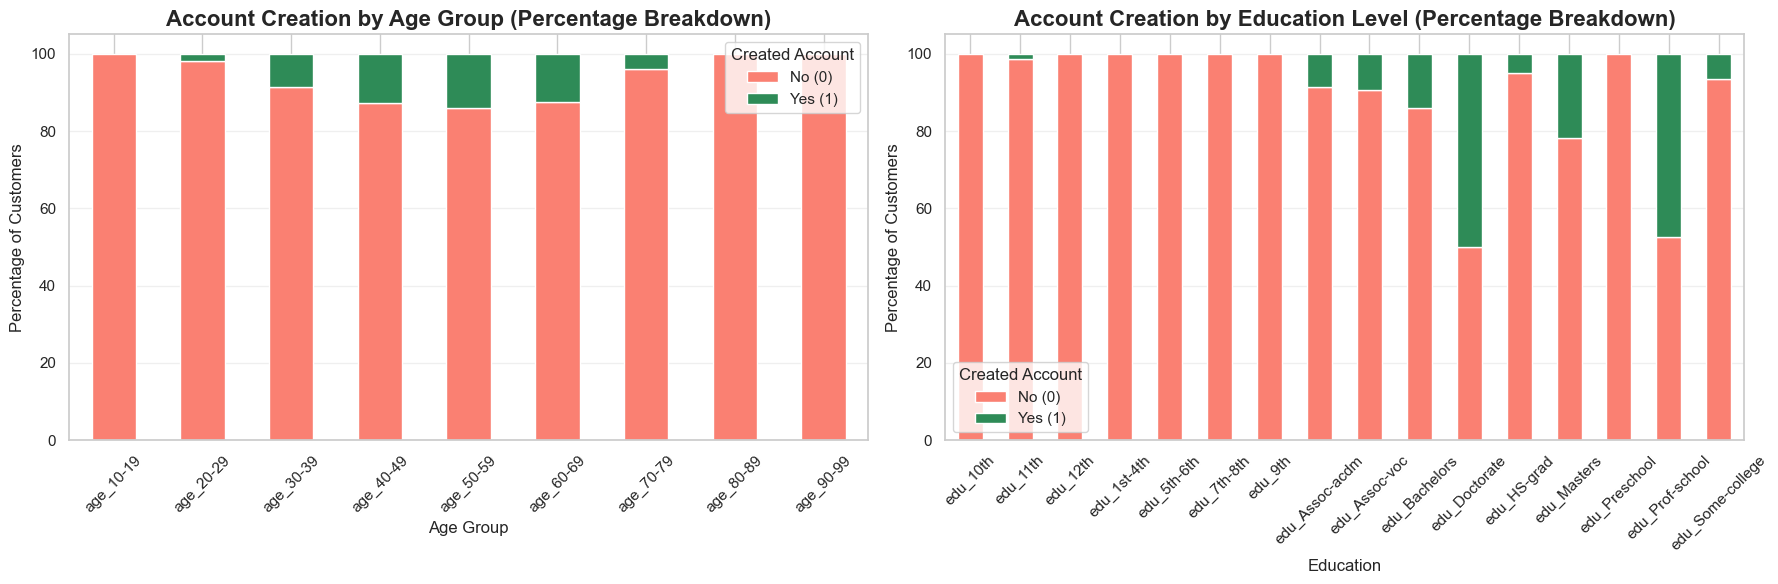


📊 Account Creation by Marital — Percentage Breakdown with Counts
created_account            no    yes  Yes Count
category                                       
Divorced                97.72   2.28          0
Married-AF-spouse      100.00   0.00          0
Married-civ-spouse      82.77  17.23          0
Married-spouse-absent  100.00   0.00          0
Never-married           99.43   0.57          0
Separated              100.00   0.00          0
Widowed                 97.96   2.04          0
------------------------------------------------------------

📊 Account Creation by Relationship — Percentage Breakdown with Counts
created_account     no    yes  Yes Count
category                                
Husband          83.99  16.01          0
Not-in-family    97.41   2.59          0
Other-relative   97.87   2.13          0
Own-child        99.60   0.40          0
Unmarried        98.72   1.28          0
Wife             77.91  22.09          0
------------------------------------------

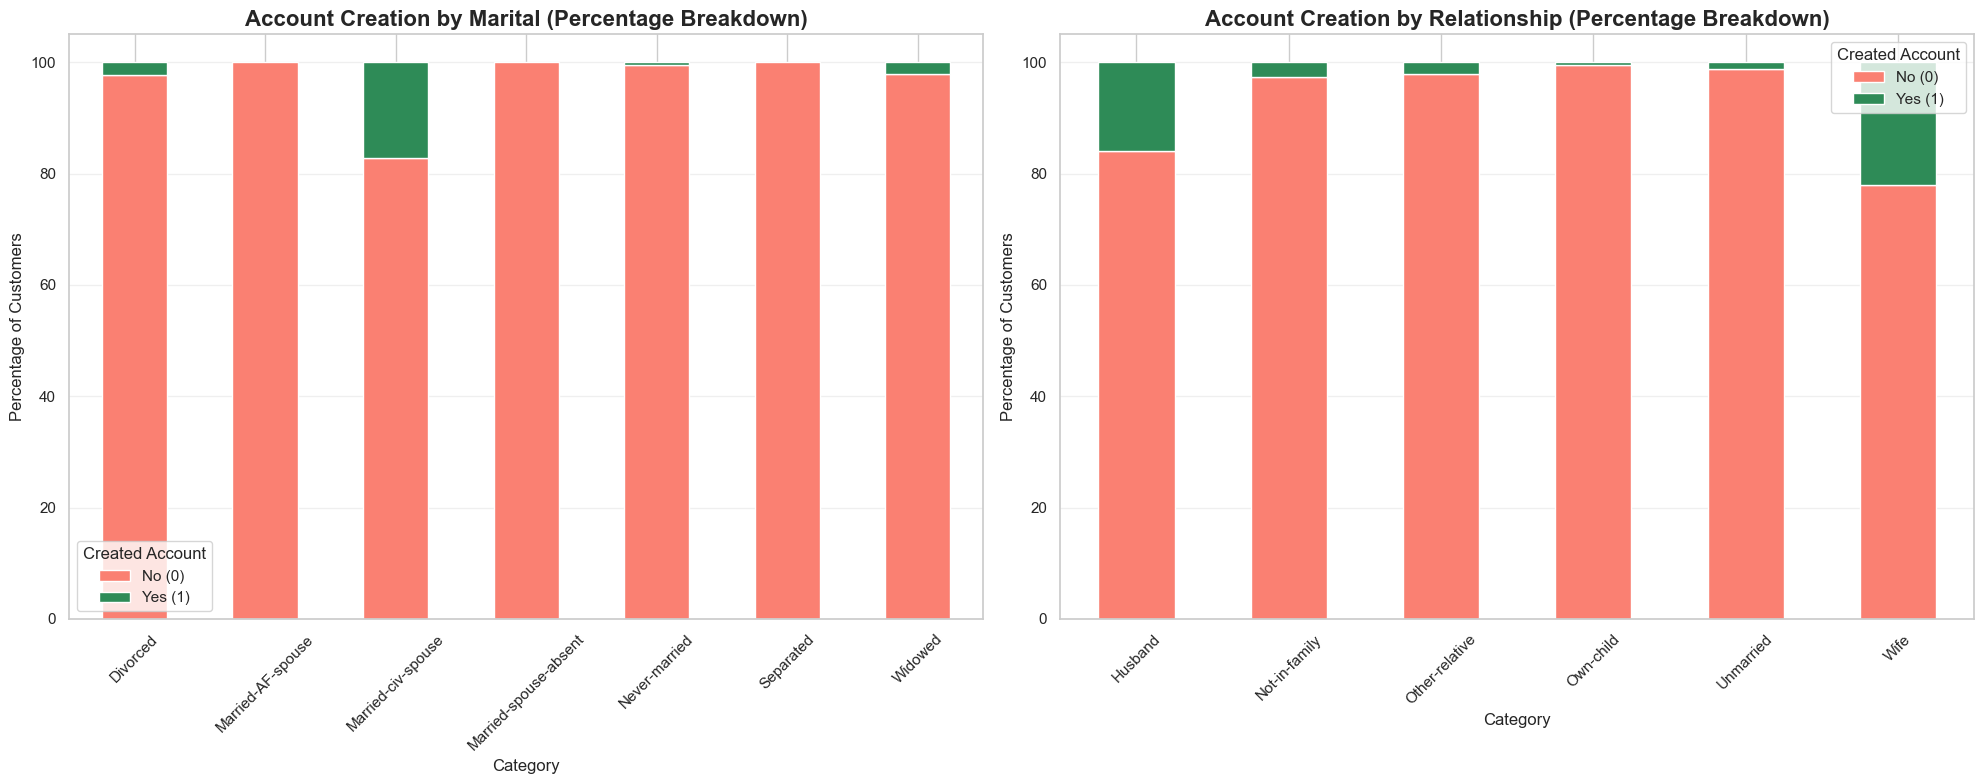


📊 Account Creation by Religion — Percentage Breakdown with Counts
created_account      no    yes  Yes Count
category                                 
Buddhism          77.78  22.22          0
Christianity      91.54   8.46          0
Hinduism          92.31   7.69          0
Islam             90.83   9.17          0
Judaism          100.00   0.00          0
Not Stated        90.85   9.15          0
Other religions  100.00   0.00          0
Sikhism          100.00   0.00          0
------------------------------------------------------------

📊 Account Creation by Workclass — Percentage Breakdown with Counts
created_account      no    yes  Yes Count
category                                 
?                 97.89   2.11          0
Federal-gov       90.24   9.76          0
Local-gov         95.56   4.44          0
Private           92.09   7.91          0
Self-emp-inc      61.29  38.71          0
Self-emp-not-inc  94.31   5.69          0
State-gov         91.18   8.82          0
------

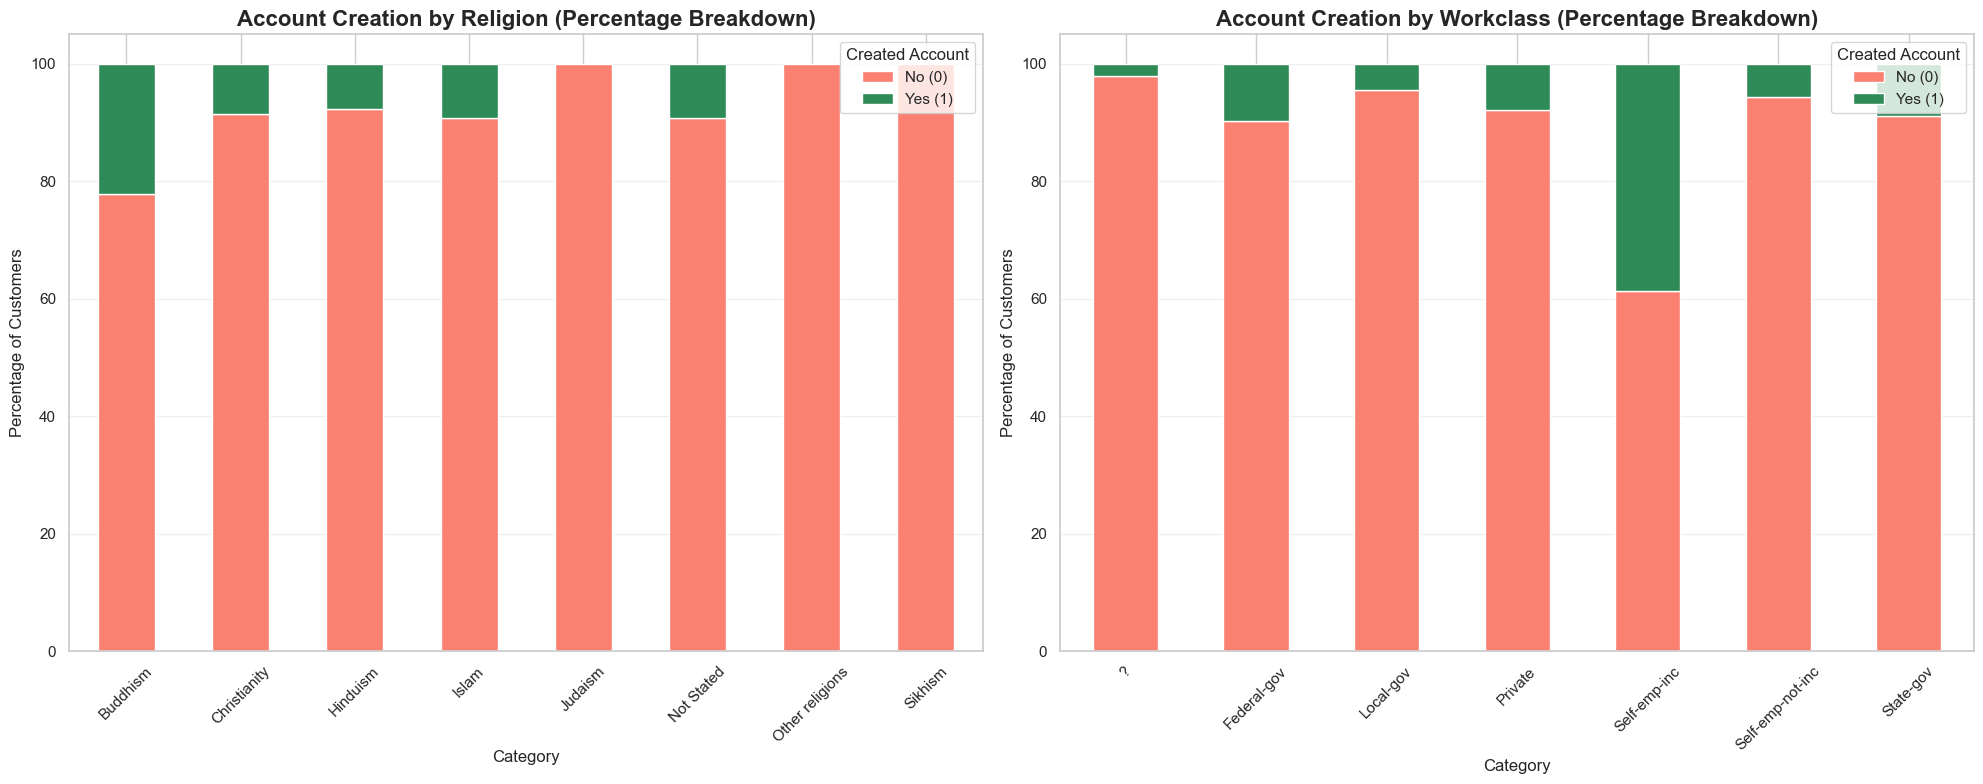


📊 Account Creation by Occupation Level — Percentage Breakdown with Counts
created_account      no     yes  Yes Count
category                                  
1                100.00    0.00          0
10                90.32    9.68          0
11                89.36   10.64          0
12                89.43   10.57          0
13                87.10   12.90          0
14                66.67   33.33          0
15                66.67   33.33          0
16                56.52   43.48          0
17                37.50   62.50          0
18                27.27   72.73          0
19                25.00   75.00          0
2                100.00    0.00          0
20                 0.00  100.00          0
3                100.00    0.00          0
4                 97.84    2.16          0
5                100.00    0.00          0
6                 96.07    3.93          0
7                 97.16    2.84          0
8                 88.39   11.61          0
9                 92.9

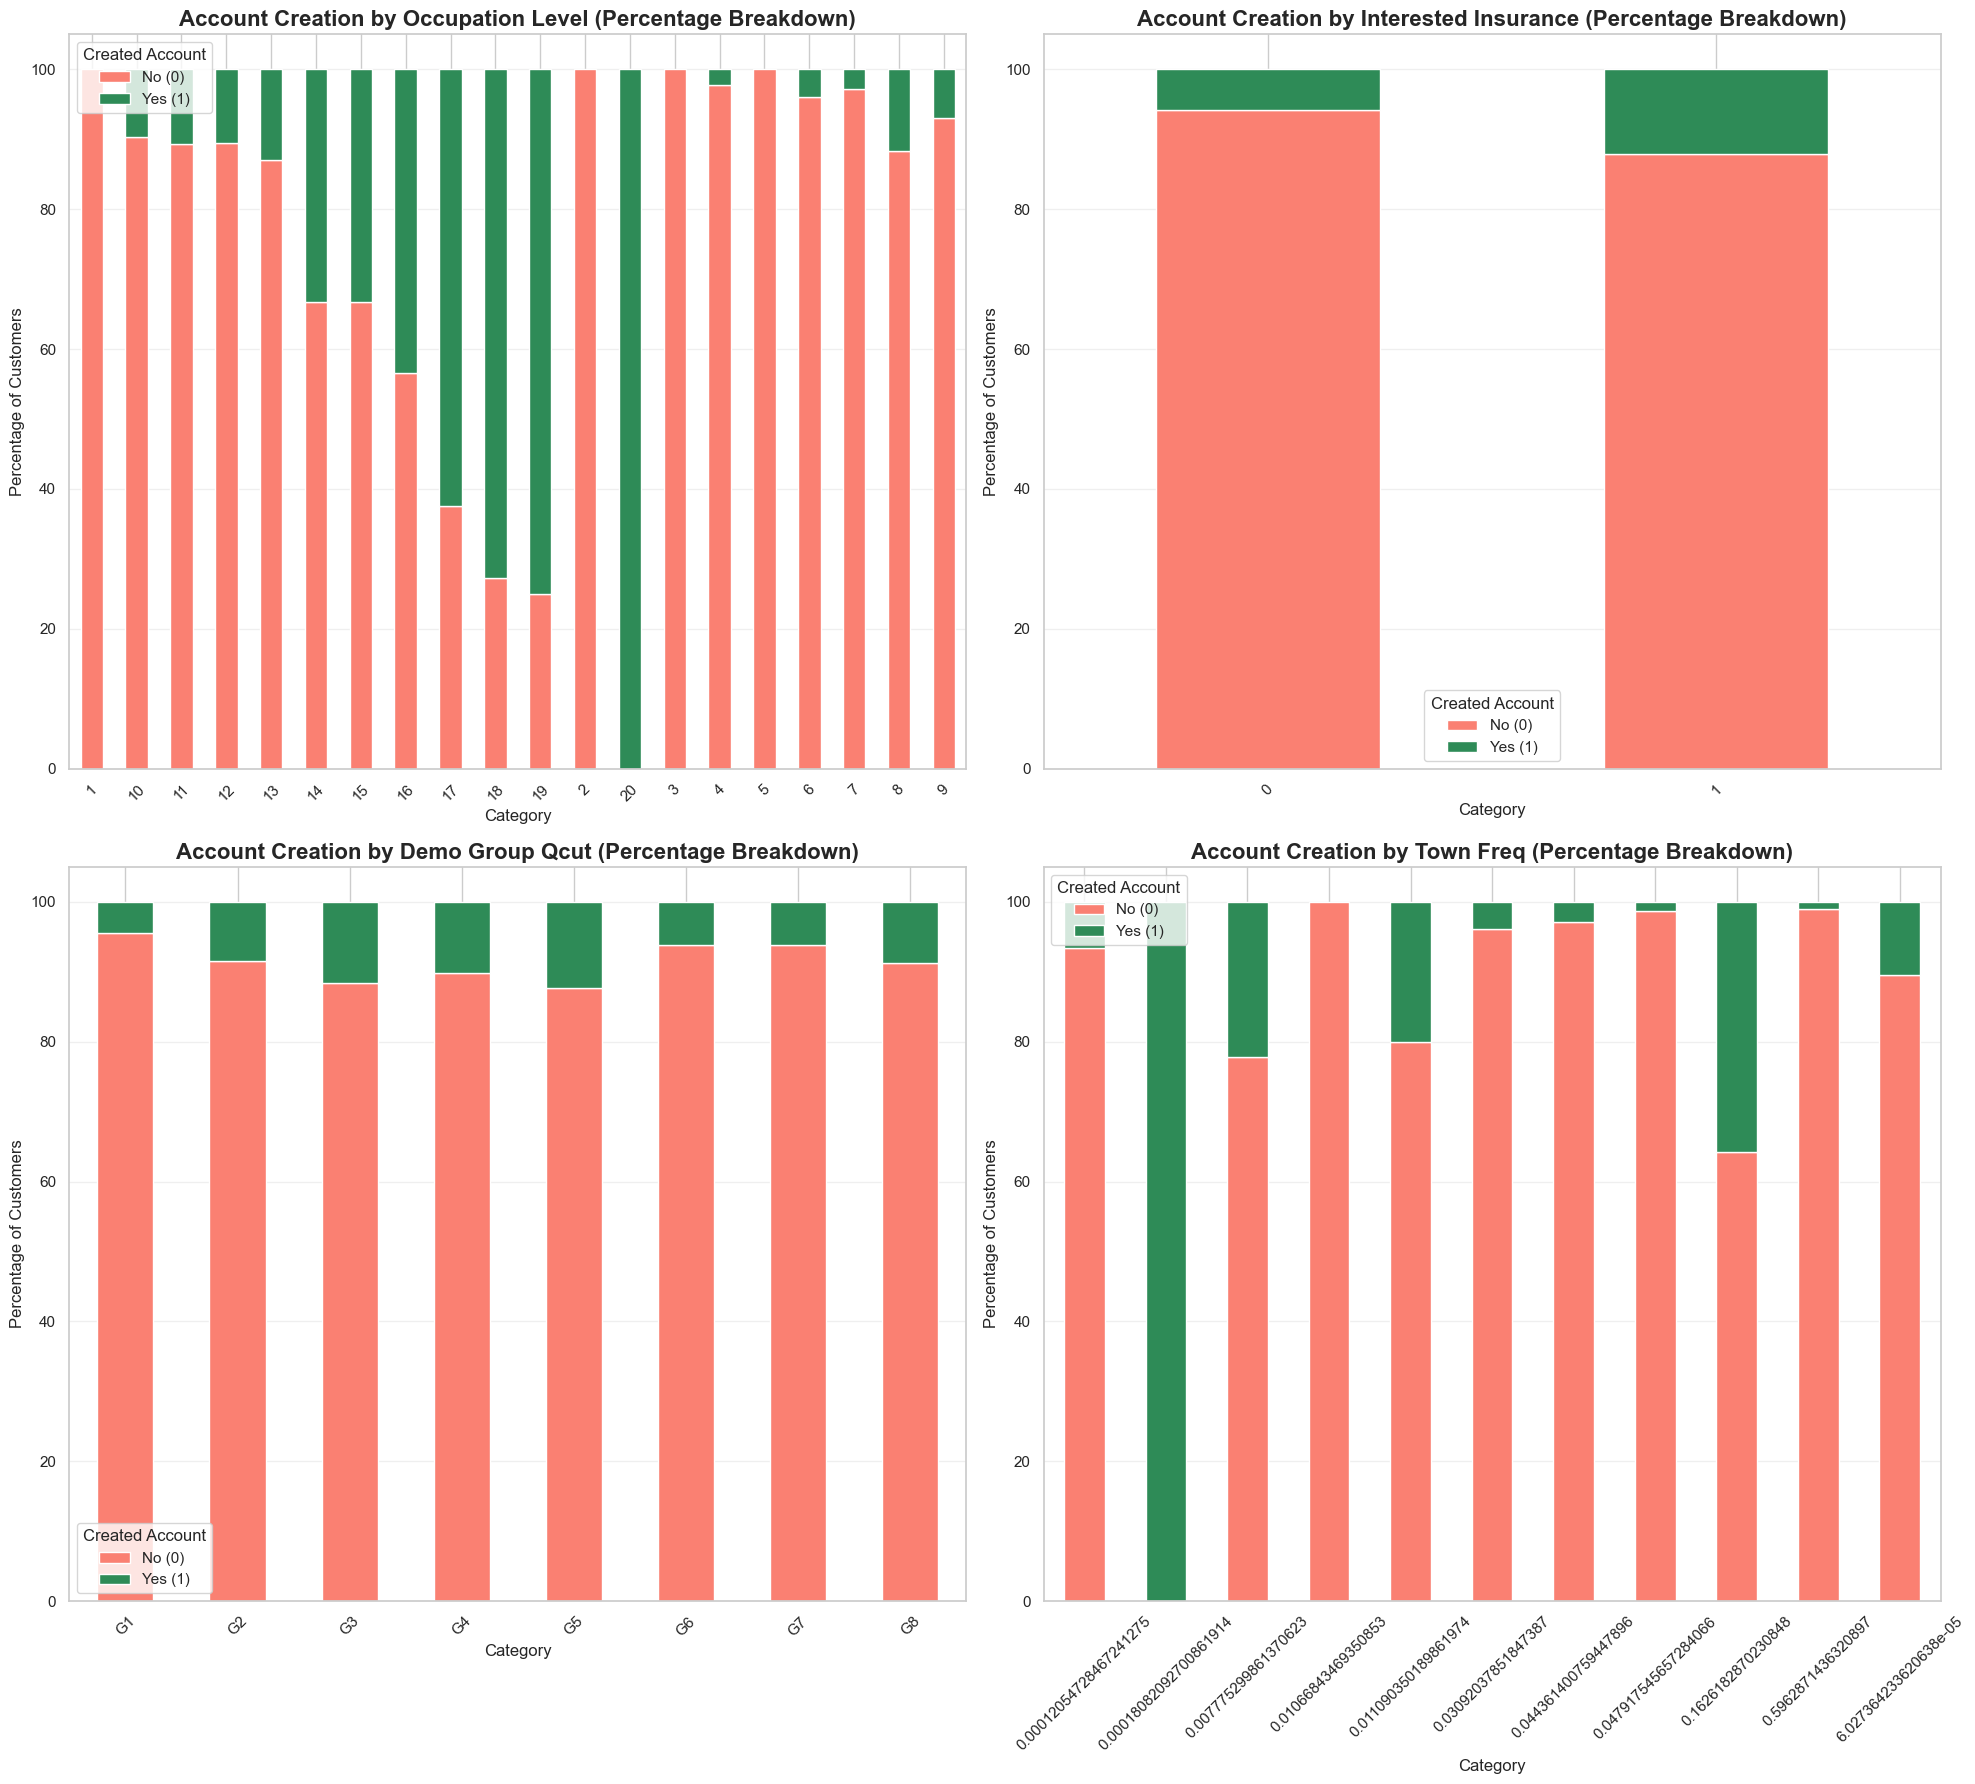

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = merged_df_clean_encoded.copy()

def plot_percentage_stacked_bar(df_long, category_col, ax, title, print_table=False):
    df_long = df_long[df_long['is_member'] == 1].copy()
    df_long[category_col] = df_long[category_col].astype(str).str.replace(f'{category_col}_', '', regex=False)

    # Raw counts
    counts = df_long.groupby([category_col, 'created_account']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot
    percentages.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'seagreen'])
    ax.set_title(f'{title} (Percentage Breakdown)', fontweight='bold', fontsize=16)
    ax.set_xlabel(category_col.replace('_', ' ').title())
    ax.set_ylabel('Percentage of Customers')
    ax.legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha=0.3, axis='y')

    # Print table
    if print_table:
        summary = percentages.round(2)
        summary['Yes Count'] = counts[1] if 1 in counts.columns else 0
        print(f"\n📊 {title} — Percentage Breakdown with Counts")
        print(summary.to_string())
        print("-" * 60)

# --- Age Group and Education Level ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

age_group_cols = [col for col in df.columns if col.startswith('age_') and '-' in col]
age_long = df[['created_account'] + age_group_cols].melt(id_vars='created_account', var_name='age_group', value_name='is_member')
plot_percentage_stacked_bar(age_long, 'age_group', axes[0], 'Account Creation by Age Group', print_table=True)

edu_cols = [col for col in df.columns if col.startswith('edu_') and not col.startswith('edu_num_')]
edu_long = df[['created_account'] + edu_cols].melt(id_vars='created_account', var_name='education', value_name='is_member')
plot_percentage_stacked_bar(edu_long, 'education', axes[1], 'Account Creation by Education Level', print_table=True)

plt.tight_layout()
plt.show()

# --- Marital and Relationship ---
group_prefixes_1 = ['marital_', 'relationship_']
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 8))

for i, prefix in enumerate(group_prefixes_1):
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
    df_long['category'] = df_long['category'].astype(str).str.replace(prefix, '', regex=False)
    plot_percentage_stacked_bar(df_long, 'category', axes1[i], f'Account Creation by {prefix[:-1].capitalize()}', print_table=True)

plt.tight_layout()
plt.show()

# --- Religion and Workclass ---
group_prefixes_2 = ['religion_', 'workclass_']
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 8))

for i, prefix in enumerate(group_prefixes_2):
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
    df_long['category'] = df_long['category'].astype(str).str.replace(prefix, '', regex=False)
    plot_percentage_stacked_bar(df_long, 'category', axes2[i], f'Account Creation by {prefix[:-1].capitalize()}', print_table=True)

plt.tight_layout()
plt.show()

# --- Occupation, Insurance Interest, Demo Group, Town Frequency ---
group_prefixes_3 = ['occupation_level', 'interested_insurance', 'demo_group_qcut', 'town_freq']
fig3, axes3 = plt.subplots(2, 2, figsize=(20, 18))
axes3 = axes3.flatten()

for i, prefix in enumerate(group_prefixes_3):
    if prefix in df.columns:
        df_long = df[['created_account', prefix]].copy()
        df_long = df_long.rename(columns={prefix: 'category'})
        df_long['is_member'] = 1
    else:
        group_cols = [col for col in df.columns if col.startswith(prefix)]
        df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
        df_long['category'] = df_long['category'].astype(str).str.replace(prefix, '', regex=False)

    plot_percentage_stacked_bar(df_long, 'category', axes3[i], f'Account Creation by {prefix.replace("_", " ").title()}', print_table=True)

plt.tight_layout()
plt.show()

In [47]:
# # Unique values and their counts for 'familiarity_FB'
# print("familiarity_FB value counts:")
# print(merged_df_clean_encoded['familiarity_FB'].value_counts())

# # Unique values and their counts for 'view_FB'
# print("\nview_FB value counts:")
# print(merged_df_clean_encoded['view_FB'].value_counts())

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_df_clean_encoded[['familiarity_FB_scaled', 'view_FB_scaled']] = scaler.fit_transform(
    merged_df_clean_encoded[['familiarity_FB', 'view_FB']]
)
merged_df_clean_encoded.drop(['familiarity_FB', 'view_FB'], axis=1, inplace=True)

In [49]:
# Step 0: Ensure numeric types
merged_df_clean_encoded['years_with_employer'] = pd.to_numeric(merged_df_clean_encoded['years_with_employer'], errors='coerce')
merged_df_clean_encoded['months_with_employer'] = pd.to_numeric(merged_df_clean_encoded['months_with_employer'], errors='coerce')

# Step 1: Combine years and months into a single duration column
merged_df_clean_encoded['employment_duration_years'] = (
    merged_df_clean_encoded['years_with_employer'] + merged_df_clean_encoded['months_with_employer'] / 12
).round(2)

# Step 2: Drop the original columns
merged_df_clean_encoded.drop(['years_with_employer', 'months_with_employer'], axis=1, inplace=True)

# Step 3: Cap outliers at the 95th percentile
duration_cap = merged_df_clean_encoded['employment_duration_years'].quantile(0.95).round(2)
merged_df_clean_encoded['employment_duration_years'] = merged_df_clean_encoded['employment_duration_years'].clip(upper=duration_cap)

# Step 4: Deskew using square root transformation
merged_df_clean_encoded['employment_duration_years_deskewed'] = np.sqrt(merged_df_clean_encoded['employment_duration_years'])

In [50]:
display(merged_df_clean_encoded.head())

,age,occupation_level,interested_insurance,created_account,hours_per_week,sex,edu_10th,edu_11th,edu_12th,edu_1st-4th,edu_5th-6th,edu_7th-8th,edu_9th,edu_Assoc-acdm,edu_Assoc-voc,edu_Bachelors,edu_Doctorate,edu_HS-grad,edu_Masters,edu_Preschool,edu_Prof-school,edu_Some-college,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,town_freq,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_China,native_country_Columbia,native_country_Ecuador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Netherlands,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Poland,native_country_Portugal,native_country_Romania,native_country_Scotland,native_country_Sweden,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United Kingdom,native_country_Vietnam,native_country_Wales,native_country_Yugoslavia,job_title_encoded,demo_group_qcut,edu_num_1,edu_num_10,edu_num_12,edu_num_13,edu_num_14,edu_num_16,edu_num_17,edu_num_18,edu_num_20,edu_num_21,edu_num_3,edu_num_4,edu_num_5,edu_num_6,edu_num_8,edu_num_9,net_profit,net_profit_deskewed,salary_value_gbp,familiarity_FB_scaled,view_FB_scaled,employment_duration_years,employment_duration_years_deskewed
0,39,1,0,no,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,266,G1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2174.0,46.626173,18109.00,0.643510,1.504428,19.17,4.378356
1,50,4,1,no,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.047918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15,G2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.000000,16945.00,1.395241,0.325885,19.17,4.378356
2,53,1,0,no,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,239,G6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.000000,19087.00,1.395241,-1.245505,19.17,4.378356
3,28,12,1,no,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,326,G8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.000000,32898.00,1.019375,1.504428,3.50,1.870829
4,31,12,1,yes,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.162618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,330,G1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7688.0,87.681241,39753.36,0.267644,-0.852657,4.33,2.080865


In [51]:
# Map 'yes' to 1, 'no' to 0, keep NaN as is
merged_df_clean_encoded['created_account'] = merged_df_clean_encoded['created_account'].map({'yes': 1, 'no': 0})

In [52]:
print("Unique values and their counts:")
print(merged_df_clean_encoded['created_account'].value_counts(dropna=False))

Unique values and their counts:
created_account
NaN    14987
0.0     1468
1.0      136
Name: count, dtype: int64


In [53]:
# 1. Copy original
df = merged_df_clean_encoded.copy()

# 2. Separate target_df (missing created_account) and clean_df (non-missing)
target_df = df[df['created_account'].isnull()].copy()
clean_df  = df[df['created_account'].notnull()].copy()


In [54]:
merged_df_clean_encoded.shape

(16591, 131)

In [55]:
print("clean_df shape:", clean_df.shape)
print("clean_df['created_account'].unique():", clean_df['created_account'].unique())

clean_df shape: (1604, 131)
clean_df['created_account'].unique(): [0. 1.]


In [56]:
target_df.shape

(14987, 131)

In [57]:
print("target_df shape:", target_df.shape)
print("target_df['created_account'].unique():", target_df['created_account'].unique())

target_df shape: (14987, 131)
target_df['created_account'].unique(): [nan]


In [58]:
# Drop target column from target_df and clean_df
target = 'created_account'
X = clean_df.drop(columns=[target])
y = clean_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [59]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [60]:

# 1. Identify column types
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Optional: drop high-cardinality categoricals (e.g., IDs, postcodes)
# Example: drop if >50 unique values
high_card = [col for col in cat_cols if X[col].nunique() > 50]
cat_cols = [col for col in cat_cols if col not in high_card]
X = X.drop(columns=high_card)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1234
)

# 2. Define preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [61]:
#train log regression

logreg_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(
        C=0.5,
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=1234
    ))
])
logreg_pipeline.fit(X_train, y_train)
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

In [62]:
#Train Random Forest
rf_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=1234, n_jobs=-1))
])

rf_pipeline.fit(X_train, y_train)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [63]:
print("Logistic Regression:")
print(classification_report(y_test, logreg_pipeline.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

print("\nRandom Forest:")
print(classification_report(y_test, rf_pipeline.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

def precision_at_k(y_true, y_scores, k):
    idx = np.argsort(y_scores)[::-1][:k]
    return np.mean(np.array(y_true)[idx])

for k in [50, 100, 200]:
    print(f"LogReg Precision@{k}:", precision_at_k(y_test.values, y_prob_logreg, k))
    print(f"RF Precision@{k}:", precision_at_k(y_test.values, y_prob_rf, k))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       294
         1.0       0.50      0.85      0.63        27

    accuracy                           0.92       321
   macro avg       0.74      0.89      0.79       321
weighted avg       0.94      0.92      0.93       321

ROC AUC: 0.9698916603678508

Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       294
         1.0       0.94      0.63      0.76        27

    accuracy                           0.97       321
   macro avg       0.96      0.81      0.87       321
weighted avg       0.97      0.97      0.96       321

ROC AUC: 0.9935752078609221
LogReg Precision@50: 0.48
RF Precision@50: 0.54
LogReg Precision@100: 0.27
RF Precision@100: 0.27
LogReg Precision@200: 0.135
RF Precision@200: 0.135


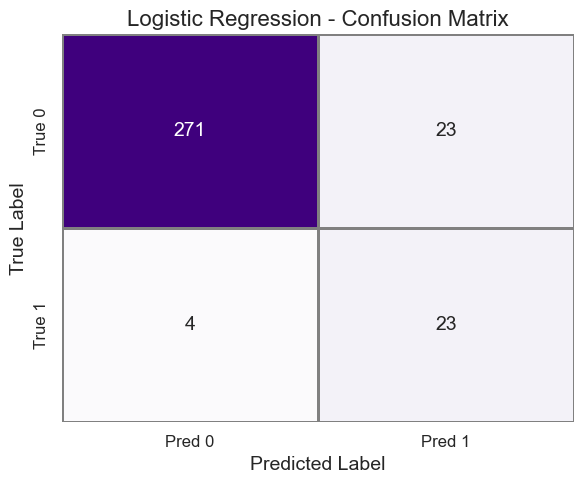

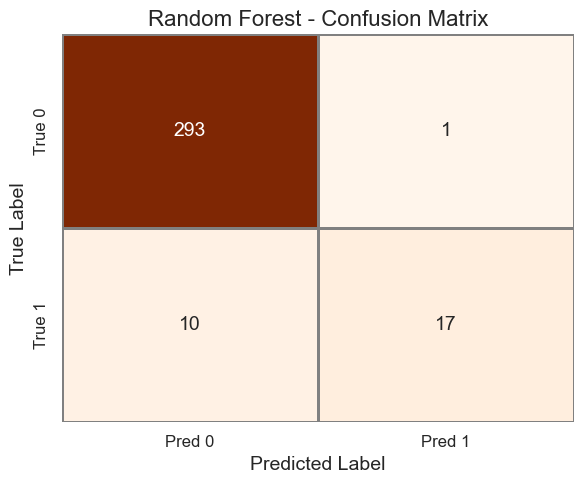

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_discrete(y_true, y_pred, title, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))

    # Use a discrete colormap with fixed value range
    vmax = cm.max()
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'],
                annot_kws={"size": 14}, linewidths=1, linecolor='gray',
                vmin=0, vmax=vmax)

    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Logistic Regression
plot_confusion_matrix_discrete(y_test, logreg_pipeline.predict(X_test), "Logistic Regression - Confusion Matrix", cmap='Purples')

# Random Forest
plot_confusion_matrix_discrete(y_test, rf_pipeline.predict(X_test), "Random Forest - Confusion Matrix", cmap='Oranges')

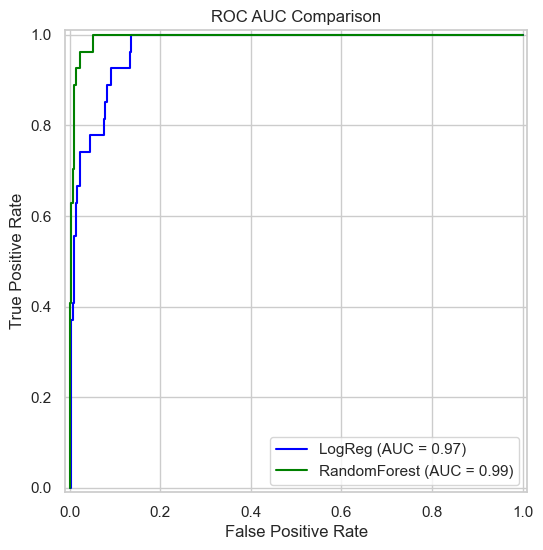

In [65]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_display_logreg = RocCurveDisplay(fpr=fpr_logreg, tpr=tpr_logreg, roc_auc=roc_auc_score(y_test, y_prob_logreg), estimator_name='LogReg')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_display_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_score(y_test, y_prob_rf), estimator_name='RandomForest')

# Plot both
plt.figure(figsize=(8, 6))
roc_display_logreg.plot(ax=plt.gca(), color='blue')
roc_display_rf.plot(ax=plt.gca(), color='green')
plt.title("ROC AUC Comparison")
plt.grid(True)
plt.show()

In [66]:
# #Logistic regression with SMOTE

# # Step 1: Split first (you've already done this)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Step 2: Apply preprocessing to training data only
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# X_test_preprocessed = preprocessor.transform(X_test)

# # Step 3: Apply SMOTE to training data
# smote = SMOTE(random_state=1234)
# X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# # Step 4: Train model on resampled data
# logreg = LogisticRegression(max_iter=1000, class_weight=None, random_state=1234)
# logreg.fit(X_resampled, y_resampled)

# # Step 5: Evaluate on original test set
# y_prob_logreg = logreg.predict_proba(X_test_preprocessed)[:, 1]
# y_pred_logreg = logreg.predict(X_test_preprocessed)

# print(classification_report(y_test, y_pred_logreg))
# print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

In [67]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix_discrete(y_true, y_pred, title, cmap):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 5))

#     # Use fixed color range for better contrast
#     vmax = cm.max()
#     sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
#                 xticklabels=['Pred 0', 'Pred 1'],
#                 yticklabels=['True 0', 'True 1'],
#                 annot_kws={"size": 14}, linewidths=1, linecolor='gray',
#                 vmin=0, vmax=vmax)

#     plt.title(title, fontsize=16)
#     plt.xlabel('Predicted Label', fontsize=14)
#     plt.ylabel('True Label', fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.tight_layout()
#     plt.show()

# # Plot confusion matrix for SMOTE-enhanced Logistic Regression
# plot_confusion_matrix_discrete(y_test, y_pred_logreg, "Logistic Regression with SMOTE - Confusion Matrix", cmap='PuBu')

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       294
         1.0       0.73      0.70      0.72        27

    accuracy                           0.95       321
   macro avg       0.85      0.84      0.85       321
weighted avg       0.95      0.95      0.95       321

ROC AUC: 0.9375157470395565


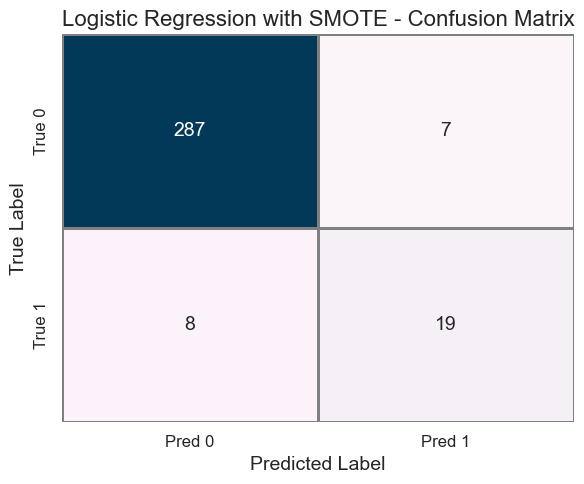

In [68]:
# 📦 Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# 📊 Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🧼 Step 2: Preprocess
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 🔄 Step 3: Apply SMOTE
smote = SMOTE(random_state=1234)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# 🧠 Step 4: Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight=None, random_state=1234)
logreg.fit(X_resampled, y_resampled)

# 📈 Step 5: Evaluate
y_prob_logreg = logreg.predict_proba(X_test_preprocessed)[:, 1]
y_pred_logreg = logreg.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

# 🎯 Step 6: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
vmax = cm.max()

sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'],
            annot_kws={"size": 14}, linewidths=1, linecolor='gray',
            vmin=0, vmax=vmax)

plt.title("Logistic Regression with SMOTE - Confusion Matrix", fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

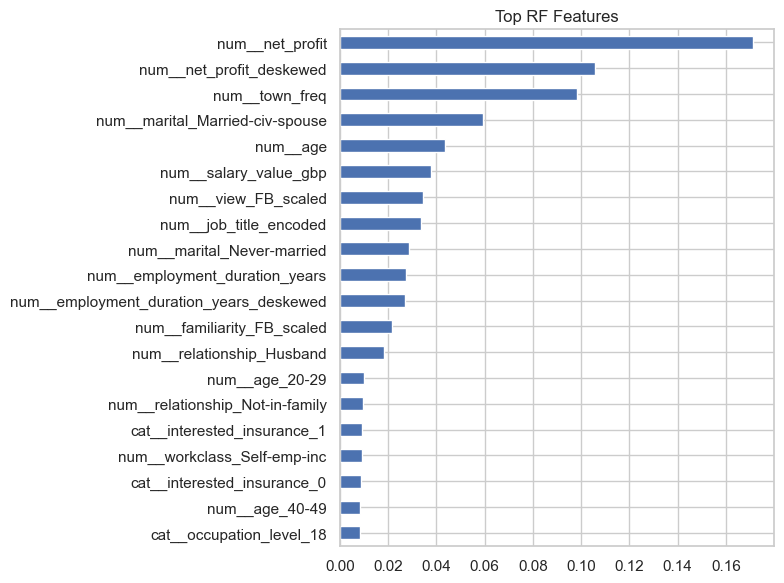

In [69]:
feature_names = rf_pipeline.named_steps['pre'].get_feature_names_out()
# Get importances
rf_importances = rf_pipeline.named_steps['clf'].feature_importances_
rf_feat_imp = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)

# Plot top 20
rf_feat_imp.head(20).plot(kind='barh', figsize=(8,6), title='Top RF Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

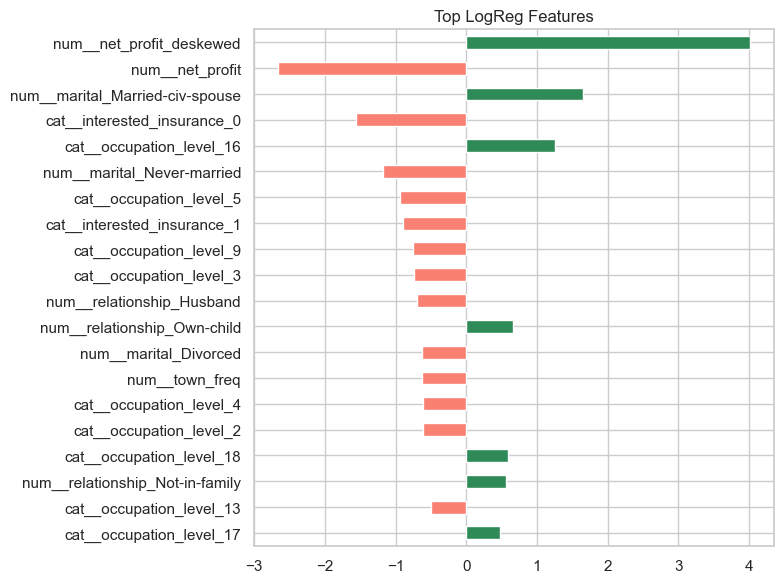

In [70]:
logreg_coefs = logreg_pipeline.named_steps['clf'].coef_[0]
logreg_feat_imp = pd.Series(logreg_coefs, index=feature_names).sort_values(key=abs, ascending=False)
colors = ['seagreen' if val > 0 else 'salmon' for val in logreg_feat_imp.head(20)]
logreg_feat_imp.head(20).plot(kind='barh', figsize=(8,6), color=colors, title='Top LogReg Features')
# Plot top 20
# logreg_feat_imp.head(20).plot(kind='barh', figsize=(8,6), title='Top LogReg Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [71]:
X_target = target_df.drop(columns=['created_account'], errors='ignore')
X_target = X_target.reindex(columns=X_train.columns)

# Predict probabilities
target_df['score_rf'] = rf_pipeline.predict_proba(X_target)[:, 1]
target_df['score_logreg'] = logreg_pipeline.predict_proba(X_target)[:, 1]

# Rank top 100
top_k_rf = target_df.sort_values('score_rf', ascending=False).head(100)
top_k_logreg = target_df.sort_values('score_logreg', ascending=False).head(100)

In [72]:
#how many customers will take insurance 

# Choose a threshold (e.g. 0.5)
threshold = 0.5

# Predict binary outcome using RF scores
target_df['predicted_account_rf'] = (target_df['score_rf'] >= threshold).astype(int)

# Count predicted creators
num_predicted = target_df['predicted_account_rf'].sum()
print(f"Estimated number of customers likely to create account: {num_predicted} out of {len(target_df)}")

Estimated number of customers likely to create account: 771 out of 14987


In [73]:
# Predict binary outcome using Logistic Regression scores
target_df['predicted_account_logreg'] = (target_df['score_logreg'] >= threshold).astype(int)

# Count predicted creators
num_predicted_logreg = target_df['predicted_account_logreg'].sum()
print(f"Estimated number of customers likely to create account (LogReg): {num_predicted_logreg} out of {len(target_df)}")

Estimated number of customers likely to create account (LogReg): 1932 out of 14987


In [74]:
from IPython.display import display

display(target_df.head(1))

,age,occupation_level,interested_insurance,created_account,hours_per_week,sex,edu_10th,edu_11th,edu_12th,edu_1st-4th,edu_5th-6th,edu_7th-8th,edu_9th,edu_Assoc-acdm,edu_Assoc-voc,edu_Bachelors,edu_Doctorate,edu_HS-grad,edu_Masters,edu_Preschool,edu_Prof-school,edu_Some-college,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,town_freq,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Netherlands,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Poland,native_country_Portugal,native_country_Romania,native_country_Scotland,native_country_Sweden,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United Kingdom,native_country_Vietnam,native_country_Wales,native_country_Yugoslavia,job_title_encoded,demo_group_qcut,edu_num_1,edu_num_10,edu_num_12,edu_num_13,edu_num_14,edu_num_16,edu_num_17,edu_num_18,edu_num_20,edu_num_21,edu_num_3,edu_num_4,edu_num_5,edu_num_6,edu_num_8,edu_num_9,net_profit,net_profit_deskewed,salary_value_gbp,familiarity_FB_scaled,view_FB_scaled,employment_duration_years,employment_duration_years_deskewed,score_rf,score_logreg,predicted_account_rf,predicted_account_logreg
1604,22,3,0,NaN,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.596287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,211,G1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18263.16,1.395241,0.718733,2.5,1.581139,0.0,0.00081,0,0


In [75]:
# ✅ Helper function to extract dominant one-hot category
def get_onehot_dominant(df, prefix, new_col):
    cols = [col for col in df.columns if col.startswith(prefix) and df[col].dtype in ['int64', 'float64']]
    df[new_col] = df[cols].idxmax(axis=1).str.replace(prefix, '')
    return df

# 🎯 Predict binary outcome using Random Forest scores
target_df['predicted_account_rf'] = (target_df['score_rf'] >= threshold).astype(int)

# 📊 Count predicted creators
num_predicted_rf = target_df['predicted_account_rf'].sum()
print(f"Estimated number of customers likely to create account (RF): {num_predicted_rf} out of {len(target_df)}")

# 🧠 Extract dominant values
target_df = get_onehot_dominant(target_df, 'edu_', 'education')
target_df = get_onehot_dominant(target_df, 'age_', 'age_group')
target_df = get_onehot_dominant(target_df, 'religion_', 'religion')
target_df = get_onehot_dominant(target_df, 'native_', 'native_country')
target_df = get_onehot_dominant(target_df, 'marital_', 'marital_status')

# 🔍 Filter predicted creators from Random Forest
predicted_rf = target_df[target_df['predicted_account_rf'] == 1]

# 📊 Count distributions
edu_counts_rf = predicted_rf['education'].value_counts()
age_counts_rf = predicted_rf['age_group'].value_counts()
religion_counts_rf = predicted_rf['religion'].value_counts()
nativecountry_counts_rf = predicted_rf['native_country'].value_counts()
marital_counts_rf = predicted_rf['marital_status'].value_counts()

# 📋 Print results
print("📘 Predicted creators by education (RF):\n", edu_counts_rf)
print("\n📊 Predicted creators by age group (RF):\n", age_counts_rf)
print("\n🕌 Predicted creators by religion (RF):\n", religion_counts_rf)
print("\n🌏 Predicted creators by native country (RF):\n", nativecountry_counts_rf)
print("\n💍 Predicted creators by marital status (RF):\n", marital_counts_rf)

Estimated number of customers likely to create account (RF): 771 out of 14987
📘 Predicted creators by education (RF):
 education
Bachelors       228
HS-grad         129
Some-college    124
Masters         112
Prof-school      61
Doctorate        40
Assoc-voc        30
Assoc-acdm       20
11th             12
12th              5
7th-8th           4
9th               3
10th              1
1st-4th           1
5th-6th           1
Name: count, dtype: int64

📊 Predicted creators by age group (RF):
 age_group
40-49    284
30-39    212
50-59    174
60-69     67
20-29     17
70-79     15
90-99      1
10-19      1
Name: count, dtype: int64

🕌 Predicted creators by religion (RF):
 religion
Christianity       635
Not Stated          64
Islam               40
Hinduism             8
Other religions      7
Sikhism              6
Buddhism             6
Judaism              5
Name: count, dtype: int64

🌏 Predicted creators by native country (RF):
 native_country
country_United Kingdom    708
country_?  

In [76]:
# # Extract dominant education, age group, and religion for each row
# edu_cols = [col for col in target_df.columns if col.startswith('edu_')]
# target_df['education'] = target_df[edu_cols].idxmax(axis=1).str.replace('edu_', '')

# age_cols = [col for col in target_df.columns if col.startswith('age_')]
# target_df['age_group'] = target_df[age_cols].idxmax(axis=1).str.replace('age_', '')

# religion_cols = [col for col in target_df.columns if col.startswith('religion_')]
# target_df['religion'] = target_df[religion_cols].idxmax(axis=1).str.replace('religion_', '')

# # native_cols = [col for col in target_df.columns if col.startswith('native_') and target_df[col].dtype in ['int64', 'float64']]
# # target_df['native_country'] = target_df[native_cols].idxmax(axis=1).str.replace('native_', '')


# # Filter predicted creators
# predicted = target_df[target_df['predicted_account_rf'] == 1]

# # Count distributions
# edu_counts = predicted['education'].value_counts()
# age_counts = predicted['age_group'].value_counts()
# religion_counts = predicted['religion'].value_counts()
# # nativecountry_counts = predicted['native_country'].value_counts()
# # Print results
# print("\nPredicted creators by education:\n", edu_counts)
# print("\nPredicted creators by age group:\n", age_counts)
# print("\nPredicted creators by religion:\n", religion_counts)
# # print("\n🌏 Predicted creators by native country:\n", nativecountry_counts)

In [77]:
# ✅ Helper function to extract dominant one-hot category
def get_onehot_dominant(df, prefix, new_col):
    cols = [col for col in df.columns if col.startswith(prefix) and df[col].dtype in ['int64', 'float64']]
    df[new_col] = df[cols].idxmax(axis=1).str.replace(prefix, '')
    return df

# 🎯 Predict binary outcome using Logistic Regression scores
target_df['predicted_account_logreg'] = (target_df['score_logreg'] >= threshold).astype(int)

# 📊 Count predicted creators
num_predicted_logreg = target_df['predicted_account_logreg'].sum()
print(f"Estimated number of customers likely to create account (LogReg): {num_predicted_logreg} out of {len(target_df)}")

# 🧠 Extract dominant values
target_df = get_onehot_dominant(target_df, 'edu_', 'education')
target_df = get_onehot_dominant(target_df, 'age_', 'age_group')
target_df = get_onehot_dominant(target_df, 'religion_', 'religion')
target_df = get_onehot_dominant(target_df, 'native_', 'native_country')
target_df = get_onehot_dominant(target_df, 'marital_', 'marital_status')

# 🔍 Filter predicted creators from Logistic Regression
predicted_logreg = target_df[target_df['predicted_account_logreg'] == 1]

# 📊 Count distributions
edu_counts_logreg = predicted_logreg['education'].value_counts()
age_counts_logreg = predicted_logreg['age_group'].value_counts()
religion_counts_logreg = predicted_logreg['religion'].value_counts()
nativecountry_counts_logreg = predicted_logreg['native_country'].value_counts()
marital_counts_logreg = predicted_logreg['marital_status'].value_counts()

# 📋 Print results
print("📘 Predicted creators by education (LogReg):\n", edu_counts_logreg)
print("\n📊 Predicted creators by age group (LogReg):\n", age_counts_logreg)
print("\n🕌 Predicted creators by religion (LogReg):\n", religion_counts_logreg)
print("\n🌏 Predicted creators by native country (LogReg):\n", nativecountry_counts_logreg)
print("\n💍 Predicted creators by marital status (LogReg):\n", marital_counts_logreg)

Estimated number of customers likely to create account (LogReg): 1932 out of 14987
📘 Predicted creators by education (LogReg):
 education
Bachelors       495
Some-college    320
Masters         298
HS-grad         296
Prof-school     201
Doctorate       127
Assoc-voc        89
Assoc-acdm       66
11th             12
12th             10
9th               5
Preschool         3
10th              3
1st-4th           3
7th-8th           2
5th-6th           2
Name: count, dtype: int64

📊 Predicted creators by age group (LogReg):
 age_group
40-49    671
30-39    493
50-59    439
20-29    154
60-69    147
70-79     20
10-19      3
80-89      3
90-99      2
Name: count, dtype: int64

🕌 Predicted creators by religion (LogReg):
 religion
Christianity       1574
Not Stated          178
Islam                93
Buddhism             36
Hinduism             23
Other religions      13
Judaism               8
Sikhism               7
Name: count, dtype: int64

🌏 Predicted creators by native country (LogR

In [78]:
# # Predict binary outcome using Logistic Regression scores
# target_df['predicted_account_logreg'] = (target_df['score_logreg'] >= threshold).astype(int)

# # Count predicted creators
# num_predicted_logreg = target_df['predicted_account_logreg'].sum()
# print(f"Estimated number of customers likely to create account (LogReg): {num_predicted_logreg} out of {len(target_df)}")

# # Extract dominant education, age group, and religion for each row
# edu_cols = [col for col in target_df.columns if col.startswith('edu_')]
# target_df['education'] = target_df[edu_cols].astype(float).idxmax(axis=1).str.replace('edu_', '')

# # ✅ Exclude 'age_group' column if it exists

# age_cols = [col for col in target_df.columns if col.startswith('age_') and target_df[col].dtype in ['int64', 'float64']]
# target_df['age_group'] = target_df[age_cols].idxmax(axis=1).str.replace('age_', '')

# religion_cols = [col for col in target_df.columns if col.startswith('religion_')]
# target_df['religion'] = target_df[religion_cols].astype(float).idxmax(axis=1).str.replace('religion_', '')

# # Filter predicted creators from Logistic Regression
# predicted_logreg = target_df[target_df['predicted_account_logreg'] == 1]

# # Count distributions
# edu_counts_logreg = predicted_logreg['education'].value_counts()
# age_counts_logreg = predicted_logreg['age_group'].value_counts()
# religion_counts_logreg = predicted_logreg['religion'].value_counts()

# # Print results
# print("📘 Predicted creators by education (LogReg):\n", edu_counts_logreg)
# print("\n📊 Predicted creators by age group (LogReg):\n", age_counts_logreg)
# print("\n🕌 Predicted creators by religion (LogReg):\n", religion_counts_logreg)

In [79]:
# import matplotlib.pyplot as plt

# edu_counts.plot(kind='barh', title='Predicted Creators by Education', figsize=(8,6))
# plt.xlabel('Number of Predicted Creators')
# plt.tight_layout()
# plt.show()

In [80]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# fig.suptitle('Random Forest: Predicted Account Creators by Demographics', fontsize=16)

# edu_counts.plot(kind='barh', ax=axes[0], color='skyblue')
# axes[0].set_title('Education')
# axes[0].set_xlabel('Count')

# age_counts.plot(kind='barh', ax=axes[1], color='lightgreen')
# axes[1].set_title('Age Group')
# axes[1].set_xlabel('Count')

# religion_counts.plot(kind='barh', ax=axes[2], color='salmon')
# axes[2].set_title('Religion')
# axes[2].set_xlabel('Count')

# plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.show()

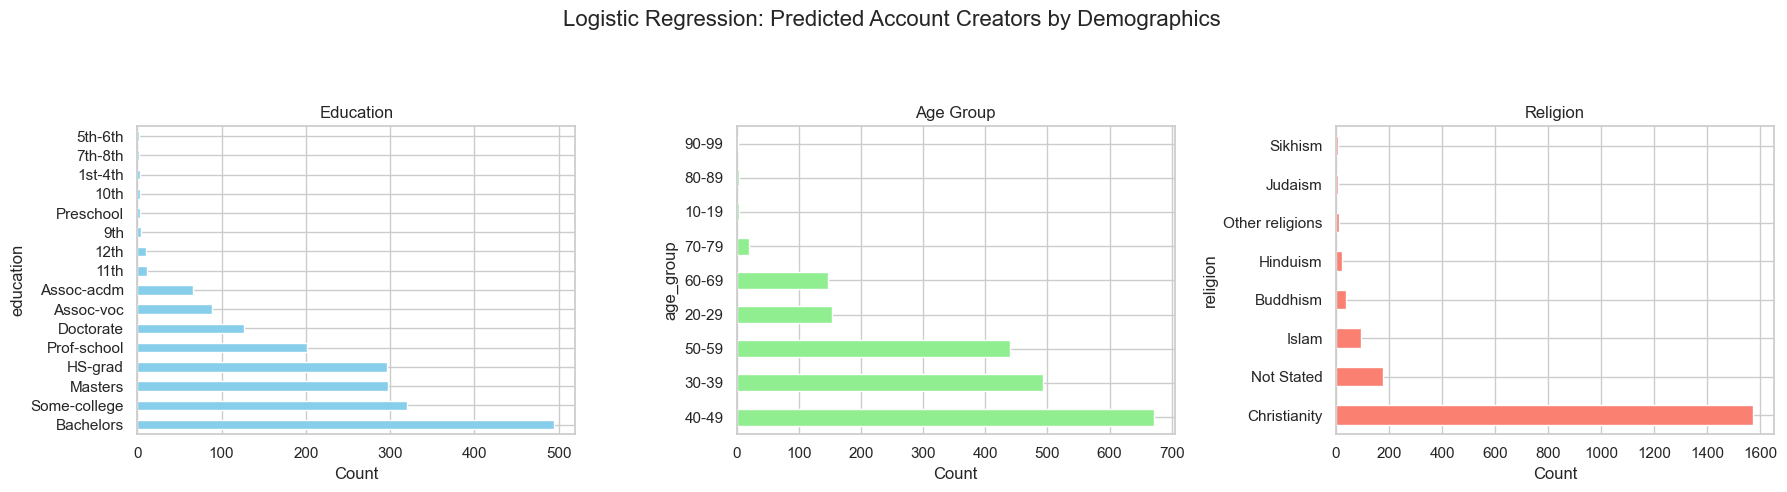

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Logistic Regression: Predicted Account Creators by Demographics', fontsize=16)

edu_counts_logreg.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Education')
axes[0].set_xlabel('Count')

age_counts_logreg.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Age Group')
axes[1].set_xlabel('Count')

religion_counts_logreg.plot(kind='barh', ax=axes[2], color='salmon')
axes[2].set_title('Religion')
axes[2].set_xlabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

In [82]:
# 1. Reconstruct categorical labels (if not already done)
edu_cols     = [col for col in target_df.columns if col.startswith('edu_')]
age_cols     = [col for col in target_df.columns if col.startswith('age_')]
marital_cols = [col for col in target_df.columns if col.startswith('marital_')]
religion_cols= [col for col in target_df.columns if col.startswith('religion_')]

target_df[edu_cols + age_cols + marital_cols + religion_cols] = target_df[
    edu_cols + age_cols + marital_cols + religion_cols
].apply(pd.to_numeric, errors='coerce')

target_df['education']      = target_df[edu_cols].idxmax(axis=1).str.replace('edu_', '')
target_df['age_group']      = target_df[age_cols].idxmax(axis=1).str.replace('age_', '')
target_df['marital_status'] = target_df[marital_cols].idxmax(axis=1).str.replace('marital_', '')
target_df['religion']       = target_df[religion_cols].idxmax(axis=1).str.replace('religion_', '')

In [83]:
# 2. Filter predicted creators
creators = target_df[target_df['predicted_account_rf'] == 1]

# 3. Group by combinations
combo_summary = creators.groupby(['education', 'age_group', 'marital_status', 'religion']).size().reset_index(name='count')

# 4. Sort by count descending
combo_summary = combo_summary.sort_values('count', ascending=False)

# 5. Display top combinations
print(combo_summary.head(20))

        education age_group      marital_status      religion  count
63      Bachelors     40-49  Married-civ-spouse  Christianity     69
50      Bachelors     30-39  Married-civ-spouse  Christianity     48
185  Some-college     40-49  Married-civ-spouse  Christianity     36
102       HS-grad     30-39  Married-civ-spouse  Christianity     29
136       Masters     40-49  Married-civ-spouse  Christianity     29
109       HS-grad     40-49  Married-civ-spouse  Christianity     28
115       HS-grad     50-59  Married-civ-spouse  Christianity     27
177  Some-college     30-39  Married-civ-spouse  Christianity     25
71      Bachelors     50-59  Married-civ-spouse  Christianity     25
163   Prof-school     40-49  Married-civ-spouse  Christianity     21
144       Masters     50-59  Married-civ-spouse  Christianity     20
192  Some-college     50-59  Married-civ-spouse  Christianity     20
81      Bachelors     60-69  Married-civ-spouse  Christianity     15
126       Masters     30-39  Marri

In [84]:
# Check distribution in full target_df
print("Religion distribution in target_df:")
print(target_df['religion'].value_counts())

print("\nMarital status distribution in target_df:")
print(target_df['marital_status'].value_counts())

Religion distribution in target_df:
religion
Christianity       12103
Not Stated          1417
Islam                859
Hinduism             253
Sikhism              127
Buddhism              88
Other religions       73
Judaism               67
Name: count, dtype: int64

Marital status distribution in target_df:
marital_status
Married-civ-spouse       6983
Never-married            4897
Divorced                 1999
Separated                 482
Widowed                   423
Married-spouse-absent     190
Married-AF-spouse          13
Name: count, dtype: int64


In [85]:
#Compare predicted creator rates across groups
# Average RF score by religion
religion_scores = target_df.groupby('religion')['score_rf'].mean().sort_values(ascending=False)
print("Average RF score by religion:\n", religion_scores)

# Average RF score by marital status
marital_scores = target_df.groupby('marital_status')['score_rf'].mean().sort_values(ascending=False)
print("\nAverage RF score by marital status:\n", marital_scores)

Average RF score by religion:
 religion
Buddhism           0.129625
Other religions    0.128288
Judaism            0.095896
Christianity       0.085196
Islam              0.085122
Sikhism            0.084874
Not Stated         0.078721
Hinduism           0.067775
Name: score_rf, dtype: float64

Average RF score by marital status:
 marital_status
Married-civ-spouse       0.150595
Married-AF-spouse        0.081846
Divorced                 0.042618
Widowed                  0.038317
Married-spouse-absent    0.036705
Separated                0.034120
Never-married            0.019077
Name: score_rf, dtype: float64


In [86]:
# import matplotlib.pyplot as plt

# # Religion
# target_df.groupby('religion')['score_rf'].mean().sort_values().plot(kind='barh', title='Avg RF Score by Religion', figsize=(8,6))
# plt.xlabel('Average RF Score')
# plt.tight_layout()
# plt.show()

# # Marital Status
# target_df.groupby('marital_status')['score_rf'].mean().sort_values().plot(kind='barh', title='Avg RF Score by Marital Status', figsize=(8,6))
# plt.xlabel('Average RF Score')
# plt.tight_layout()
# plt.show()

In [87]:
# 1. Reconstruct categorical labels
edu_cols     = [col for col in target_df.columns if col.startswith('edu_')]
age_cols     = [col for col in target_df.columns if col.startswith('age_')]
marital_cols = [col for col in target_df.columns if col.startswith('marital_')]
religion_cols= [col for col in target_df.columns if col.startswith('religion_')]

target_df[edu_cols + age_cols + marital_cols + religion_cols] = target_df[
    edu_cols + age_cols + marital_cols + religion_cols
].apply(pd.to_numeric, errors='coerce')

target_df['education']      = target_df[edu_cols].idxmax(axis=1).str.replace('edu_', '')
target_df['age_group']      = target_df[age_cols].idxmax(axis=1).str.replace('age_', '')
target_df['marital_status'] = target_df[marital_cols].idxmax(axis=1).str.replace('marital_', '')
target_df['religion']       = target_df[religion_cols].idxmax(axis=1).str.replace('religion_', '')

In [88]:
# 2. Create segment summary
segment_summary = target_df.groupby(['education', 'age_group', 'marital_status', 'religion']).agg(
    segment_size=('score_rf', 'count'),
    avg_score=('score_rf', 'mean'),
    predicted_creators=('predicted_account_rf', 'sum')
).reset_index()

# 3. Filter top segments
top_segments = segment_summary[
    (segment_summary['predicted_creators'] >= 10) &
    (segment_summary['avg_score'] >= 0.1)
].sort_values(by='predicted_creators', ascending=False)

# 4. Display top segments
print(top_segments.head(20))

         education age_group      marital_status      religion  segment_size  avg_score  predicted_creators
615      Bachelors     40-49  Married-civ-spouse  Christianity           318   0.274057                  69
586      Bachelors     30-39  Married-civ-spouse  Christianity           368   0.189356                  48
1132  Some-college     40-49  Married-civ-spouse  Christianity           301   0.167399                  36
940        Masters     40-49  Married-civ-spouse  Christianity           135   0.325156                  29
804        HS-grad     40-49  Married-civ-spouse  Christianity           463   0.116873                  28
836        HS-grad     50-59  Married-civ-spouse  Christianity           338   0.118393                  27
638      Bachelors     50-59  Married-civ-spouse  Christianity           181   0.206635                  25
1105  Some-college     30-39  Married-civ-spouse  Christianity           314   0.123876                  25
1034   Prof-school     40-49

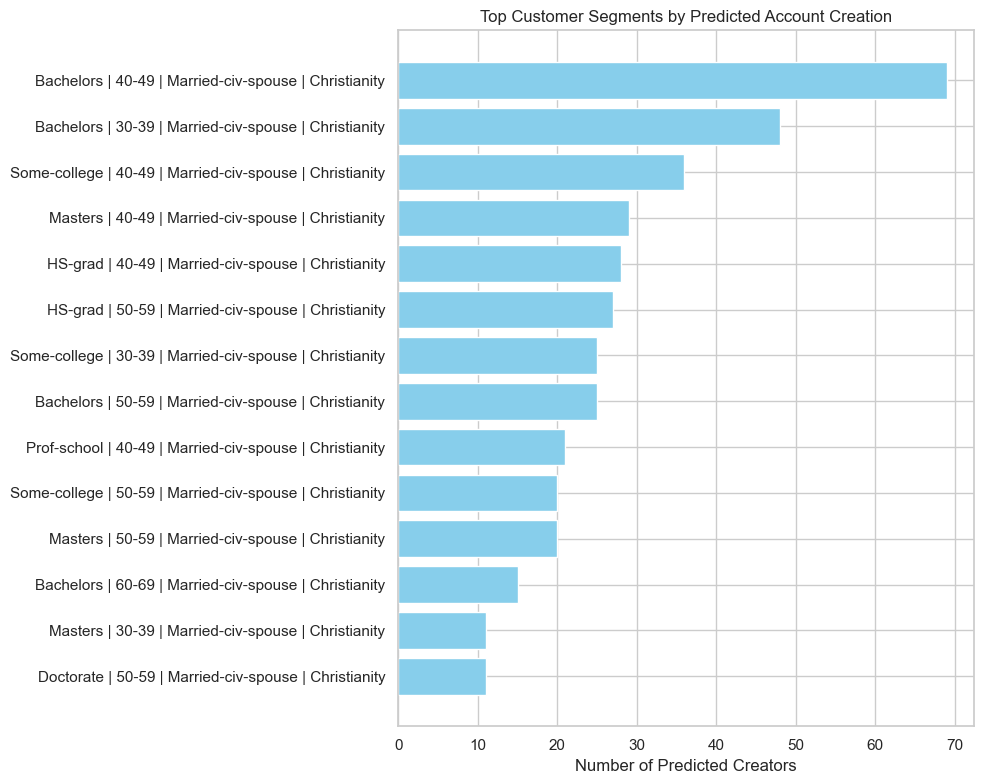

In [89]:
import matplotlib.pyplot as plt

# 1. Create segment labels
top_segments['segment_label'] = (
    top_segments['education'] + ' | ' +
    top_segments['age_group'] + ' | ' +
    top_segments['marital_status'] + ' | ' +
    top_segments['religion']
)

# 2. Sort by predicted creators
top_segments_sorted = top_segments.sort_values('predicted_creators', ascending=True).tail(20)

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_segments_sorted['segment_label'], top_segments_sorted['predicted_creators'], color='skyblue')
plt.xlabel('Number of Predicted Creators')
plt.title('Top Customer Segments by Predicted Account Creation')
plt.tight_layout()
plt.show()

SHAP for Logistic Regression inside a Pipeline (logreg_pipeline)

In [90]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

EXPLAINABILITY_OUTPUT_DIR = Path("output/explainability_plots")
EXPLAINABILITY_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def explain_model_shap(model, X_test, model_name="Model", model_type="rf", save_plots=True):
    """
    Generate SHAP explanations for Random Forest or Logistic Regression models.
    
    Parameters
    ----------
    model : sklearn Pipeline
        Trained model with 'pre' and 'clf'
    X_test : pd.DataFrame
        Raw test data
    model_name : str
        Name of the model
    model_type : str
        'rf' or 'logreg'
    save_plots : bool
        Whether to save plots
    """

    # Preprocess data
    X_test_pre = model.named_steps['pre'].transform(X_test)
    feature_names = model.named_steps['pre'].get_feature_names_out()
    X_test_pre_df = pd.DataFrame(X_test_pre, columns=feature_names, index=X_test.index)

    if model_type.lower() == "rf":
        print(f"\nSHAP for Random Forest: {model_name}")

        explainer = shap.TreeExplainer(model.named_steps['clf'])
        shap_values = explainer.shap_values(X_test_pre_df)

        # Binary classifier → use class 1 SHAP values
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

        shap.summary_plot(shap_values, X_test_pre_df, feature_names=feature_names, show=False)
        plt.title(f"{model_name} - SHAP Summary")
        plt.tight_layout()

        if save_plots:
            plt.savefig(EXPLAINABILITY_OUTPUT_DIR / f"{model_name.lower()}_rf_shap.png",
                        dpi=300, bbox_inches="tight")
        plt.show()

        return shap_values, feature_names

    elif model_type.lower() in ["logreg", "logistic"]:
        print(f"\nSHAP for Logistic Regression: {model_name}")

        logreg_clf = model.named_steps['clf']
        explainer = shap.Explainer(logreg_clf, X_test_pre)
        shap_values = explainer(X_test_pre)

        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"{model_name} - SHAP Summary")
        plt.tight_layout()

        if save_plots:
            plt.savefig(EXPLAINABILITY_OUTPUT_DIR / f"{model_name.lower()}_logreg_shap.png",
                        dpi=300, bbox_inches="tight")
        plt.show()

        return shap_values, feature_names

    else:
        print(f"Unknown model_type: {model_type}")
        return None, None


In [91]:
def get_feature_importance(model, model_name="Model"):
    """
    Returns feature importance or coefficients.
    Works for Random Forest and Logistic Regression.
    """
    feature_names = model.named_steps['pre'].get_feature_names_out()
    clf = model.named_steps['clf']

    if hasattr(clf, "feature_importances_"):
        # Random Forest
        return pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)

    elif hasattr(clf, "coef_"):
        # Logistic Regression
        coef = clf.coef_[0]
        return pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False)

    else:
        print(f"No importances found for {model_name}")
        return None


In [92]:
def plot_feature_importance(model, model_name="Model", top_n=20, save_plot=True):
    feat_imp = get_feature_importance(model, model_name)
    if feat_imp is None:
        return

    top_features = feat_imp.head(top_n)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind="barh")
    plt.title(f"Top {top_n} Features - {model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()

    if save_plot:
        plt.savefig(EXPLAINABILITY_OUTPUT_DIR / f"{model_name.lower()}_feature_importance.png",
                    dpi=300, bbox_inches="tight")

    plt.show()
